In [1]:
import pandas as pd
import numpy as np
import copy
import warnings

warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('vitrina_final.csv', sep=';')
data.set_index('Телефон_new', inplace=True)

In [3]:
data.head()

,Выручка_buyed,Абсолютная маржа_buyed,Маржа_buyed,Средняя маржа_buyed,Средний чек_buyed,Кол-во чеков_buyed,Кол-во товаров_buyed,Среднее кол-во товаров в чеке_buyed,Кол-во уникальных клиентов_buyed,Ценность клиента_buyed,...,ПОДГУЗНИКИ,ДЕТСКОЕ ПИТАНИЕ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ИнтернетДоставка,Калуга,Москва,Ростов-на-Дону,Саратов,Другой
Телефон_new,,,,,,,,,,,,,,,,,,,,,
55574954-50515053535277,992,435,0.438508,217.5,545,2,3,2,1,435,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55574954-56545048505170,4038,1262,0.312531,631.0,2636,2,18,9,1,1262,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55575349-49505555535574,7910,2891,0.365487,2891.0,7910,1,2,2,1,2891,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55574854-55525053544978,1101,459,0.416894,459.0,1150,1,2,2,1,459,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
55575351-51495656575170,4728,1414,0.299069,707.0,2414,2,25,12,1,1414,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data.describe()

,Выручка_buyed,Абсолютная маржа_buyed,Маржа_buyed,Средняя маржа_buyed,Средний чек_buyed,Кол-во чеков_buyed,Кол-во товаров_buyed,Среднее кол-во товаров в чеке_buyed,Кол-во уникальных клиентов_buyed,Ценность клиента_buyed,...,ПОДГУЗНИКИ,ДЕТСКОЕ ПИТАНИЕ,ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА,ТОВАРЫ ДЛЯ ЖИВОТНЫХ,ИнтернетДоставка,Калуга,Москва,Ростов-на-Дону,Саратов,Другой
count,112594.000000,112594.000000,112594.000000,112594.000000,112594.000000,112594.000000,112594.000000,112594.000000,112594.0,112594.000000,...,109529.000000,109529.0,109529.000000,109529.000000,108901.000000,108901.000000,109244.0,109089.0,109099.0,111865.0
mean,4471.111507,1299.569258,0.000180,907.795208,3331.038146,1.447466,4.521262,2.828508,1.0,1299.569258,...,0.151796,0.0,0.000776,0.012656,0.997212,0.002788,inf,inf,inf,inf
std,6438.660828,2484.023283,61.711911,1578.834418,4541.009207,1.159842,8.077372,3.590524,0.0,2484.023283,...,0.320206,0.0,0.023671,0.103928,0.052274,0.052274,NaN,NaN,NaN,NaN
min,1.000000,-15387.000000,-15387.000000,-15387.000000,0.000000,1.000000,1.000000,1.000000,1.0,-15387.000000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,1199.000000,185.000000,0.135705,164.000000,1149.000000,1.000000,1.000000,1.000000,1.0,185.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0
50%,2399.000000,545.000000,0.257162,438.500000,2049.000000,1.000000,2.000000,1.000000,1.0,545.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0
75%,4952.000000,1442.000000,0.374973,1068.000000,3520.000000,1.000000,5.000000,3.000000,1.0,1442.000000,...,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.0,0.0,0.0,0.0
max,279050.000000,145739.000000,0.995197,80810.000000,118200.000000,41.000000,266.000000,109.000000,1.0,145739.000000,...,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,inf,inf,inf,inf


In [5]:
data = data.dropna(subset = data.columns)

<h3> NA </h3>

In [6]:
data.isna().sum(axis=0)

Выручка_buyed                           0
Абсолютная маржа_buyed                  0
Маржа_buyed                             0
Средняя маржа_buyed                     0
Средний чек_buyed                       0
Кол-во чеков_buyed                      0
Кол-во товаров_buyed                    0
Среднее кол-во товаров в  чеке_buyed    0
Кол-во уникальных клиентов_buyed        0
Ценность клиента_buyed                  0
Выручка_all                             0
Абсолютная маржа_all                    0
Маржа_all                               0
Средняя маржа_all                       0
Средний чек_all                         0
Кол-во чеков_all                        0
Кол-во товаров_all                      0
Среднее кол-во товаров в  чеке_all      0
Кол-во уникальных клиентов_all          0
Ценность клиента_all                    0
КРУПНОГАБАРИТНЫЙ ТОВАР                  0
ТЕКСТИЛЬ, ТРИКОТАЖ                      0
ОБУВЬ                                   0
КАНЦТОВАРЫ, КНИГИ, ДИСКИ          

In [7]:
df = copy.deepcopy(data)

<h1>Remove correlation</h1>

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.context('seaborn');

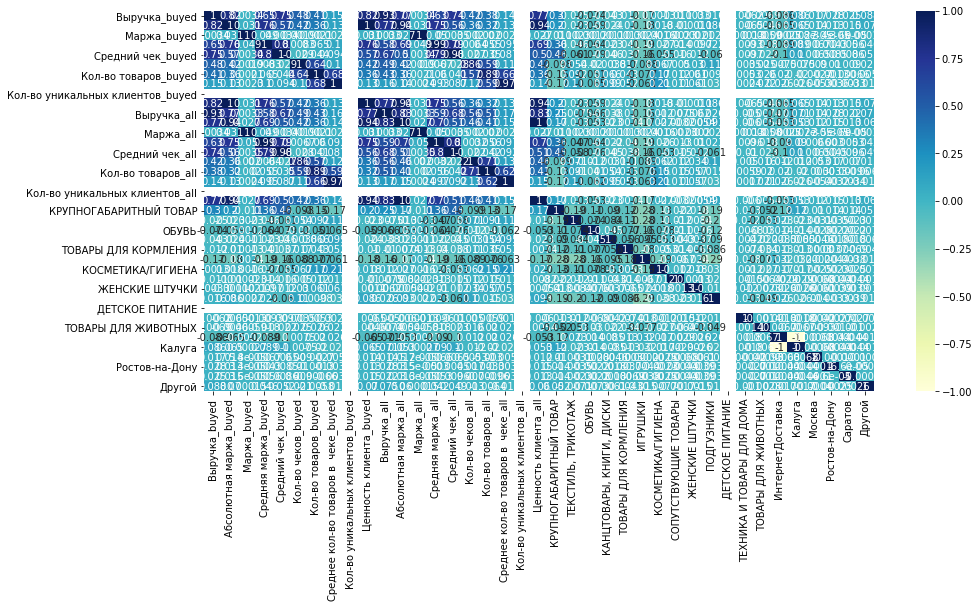

In [9]:
fig = plt.figure(figsize = (15, 7))
sns.heatmap(df.corr(), annot=True, cmap = 'YlGnBu');

In [11]:
corr = df.drop(['Кол-во уникальных клиентов_buyed', 'Кол-во уникальных клиентов_all'], axis=1).corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

In [9]:
df.columns

Index(['Выручка_buyed', 'Абсолютная маржа_buyed', 'Маржа_buyed',
       'Средняя маржа_buyed', 'Средний чек_buyed', 'Кол-во чеков_buyed',
       'Кол-во товаров_buyed', 'Среднее кол-во товаров в  чеке_buyed',
       'Кол-во уникальных клиентов_buyed', 'Ценность клиента_buyed',
       'Выручка_all', 'Абсолютная маржа_all', 'Маржа_all', 'Средняя маржа_all',
       'Средний чек_all', 'Кол-во чеков_all', 'Кол-во товаров_all',
       'Среднее кол-во товаров в  чеке_all', 'Кол-во уникальных клиентов_all',
       'Ценность клиента_all', 'КРУПНОГАБАРИТНЫЙ ТОВАР', 'ТЕКСТИЛЬ, ТРИКОТАЖ',
       'ОБУВЬ', 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'ИГРУШКИ',
       'КОСМЕТИКА/ГИГИЕНА', 'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ЖЕНСКИЕ ШТУЧКИ',
       'ПОДГУЗНИКИ', 'ДЕТСКОЕ ПИТАНИЕ', 'ТЕХНИКА И ТОВАРЫ ДЛЯ ДОМА',
       'ТОВАРЫ ДЛЯ ЖИВОТНЫХ', 'ИнтернетДоставка', 'Калуга', 'Москва',
       'Ростов-на-Дону', 'Саратов', 'Другой'],
      dtype='object')

In [10]:
df = df.drop(['Выручка_buyed', 'Выручка_all', 'Средний чек_all', 'Среднее кол-во товаров в  чеке_all'],
             axis=1)

#              'Маржа_all', 'Средняя маржа_all', 'Ценность клиента_all'
#df = df.drop(['Выручка_buyed', 'Средний чек_buyed', 'Среднее кол-во товаров в  чеке_buyed',
              #'Выручка_all', 'Абсолютная маржа_all', 'Маржа_all', 'Средняя маржа_all',
              #'Средний чек_all', 'Кол-во чеков_all', 'Кол-во товаров_all',
              #'Среднее кол-во товаров в  чеке_all', 'Кол-во уникальных клиентов_all',
              #'Ценность клиента_all'], axis=1)

In [11]:
df.shape

(105853, 35)

<h1>Remove outliers</h1>

In [12]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [13]:
%%time
outliers = IsolationForest(n_estimators=20, random_state=0).fit_predict(df.values)  # fit 3 trees  
outliers = (outliers+1)//2

print('% of outliers with Isolation forest:', 1 - (np.sum(outliers) / df.shape[0]))

% of outliers with Isolation forest: 0.04447677439467945
CPU times: user 1.27 s, sys: 213 ms, total: 1.49 s
Wall time: 1.52 s


In [14]:
df = df.loc[np.array(df.index)[outliers == 1]]

In [15]:
df.shape

(101145, 35)

<h1>Normalize data</h1>

In [16]:
from sklearn import preprocessing

In [17]:
# define scaler
#scaler = preprocessing.MinMaxScaler()
scaler = preprocessing.StandardScaler()
# normalize
X = scaler.fit_transform(df)

# K-means 

In [18]:
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, MiniBatchKMeans, OPTICS

In [19]:
from scipy.spatial.distance import cdist

In [66]:
%%time
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
    print('{} / {}'.format(k,K[-1]))

1 / 9
2 / 9
3 / 9
4 / 9
5 / 9
6 / 9
7 / 9
8 / 9
9 / 9
CPU times: user 2min 6s, sys: 7.77 s, total: 2min 14s
Wall time: 41.9 s


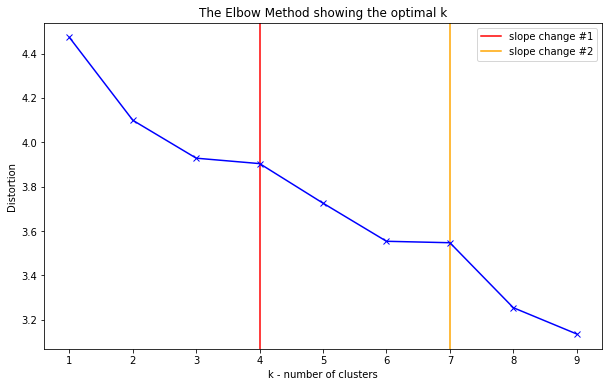

In [67]:
# Plot the elbow
plt.figure(figsize=(10, 6))
plt.axvline(4, 0, 1, label='slope change #1', color='red')
plt.axvline(7, 0, 1, label='slope change #2', color='orange')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

In [20]:
from sklearn.decomposition import PCA, TruncatedSVD

In [21]:
Y_pca = PCA(n_components=2).fit_transform(X);
Y_svd = TruncatedSVD(n_components=2).fit_transform(X);

In [22]:
K = 4
#kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
kmeanModel = KMeans(n_clusters=K).fit(X) # BEST

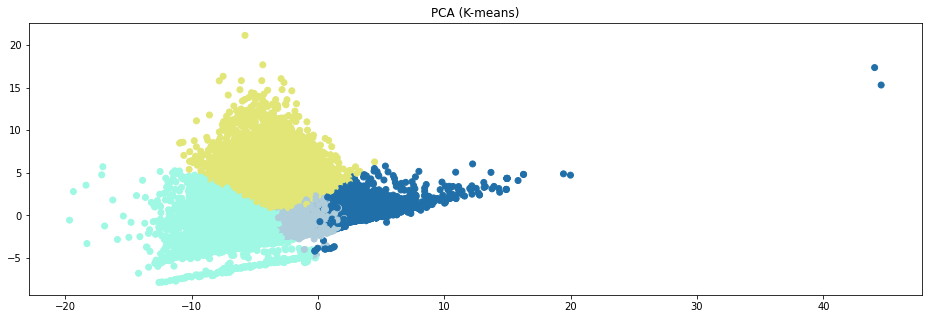

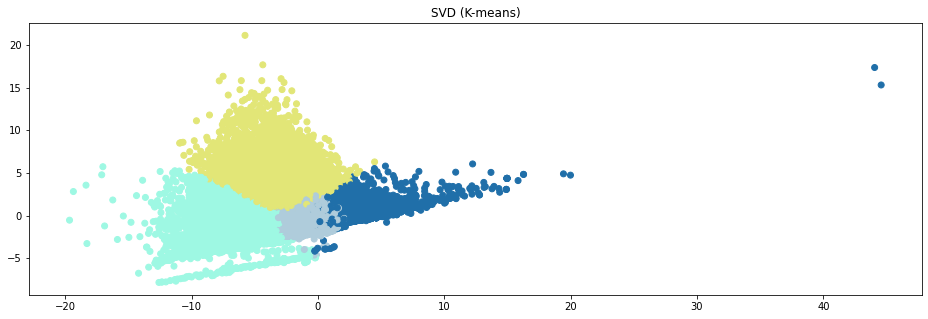

In [133]:
np.random.seed(21)
colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(16,5));
plt.title('PCA (K-means)')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

plt.figure(figsize=(16,5)); plt.title('SVD (K-means)')
plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c=c_arr);

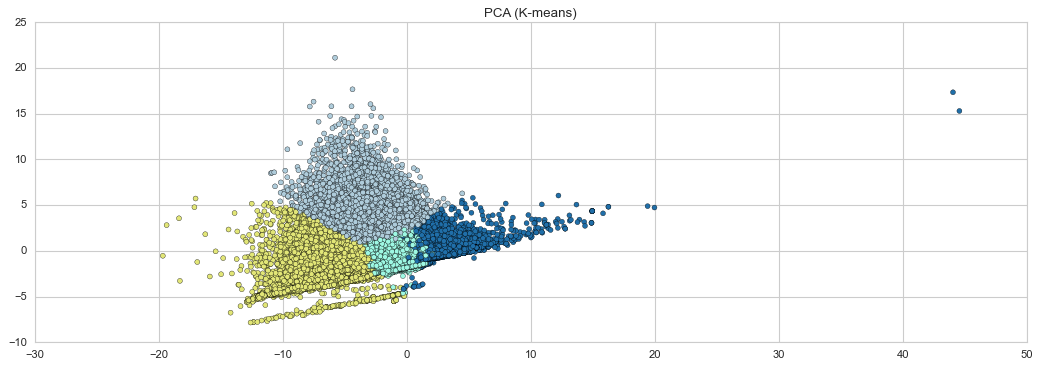

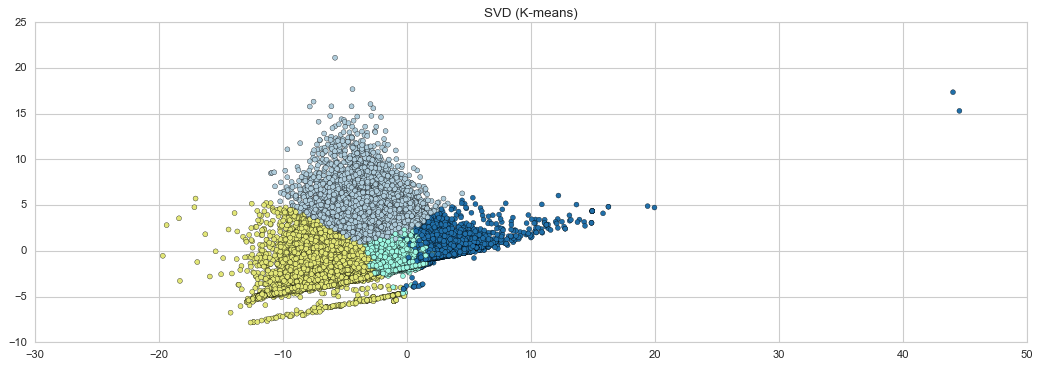

In [88]:
np.random.seed(21)
colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

plt.figure(figsize=(16,5));
plt.title('PCA (K-means)')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

plt.figure(figsize=(16,5)); plt.title('SVD (K-means)')
plt.scatter(Y_svd[:, 0], Y_svd[:, 1], c=c_arr);

In [135]:
# coordinates of cluster center
centroids = kmeanModel.cluster_centers_ 

# cluster label for each data point
labels = kmeanModel.labels_

df['Labels'] = kmeanModel.labels_

df_1 = df[(df['Labels'] == 0)]
df_2 = df[(df['Labels'] == 1)]
df_3 = df[(df['Labels'] == 2)]
df_4 = df[(df['Labels'] == 3)]
#df_5 = df[(df['Labels'] == 4)]
#df_1_4 = df[(df['Labels'] != 4)]

print('Segment 1: ', len(df_1))
print('Segment 2: ', len(df_2))
print('Segment 3: ', len(df_3))
print('Segment 4: ', len(df_4))
#print('Segment 5: ', len(df_5))
print('df: ', len(df))
#print('sum 1-4: ', (len(df_1)+len(df_2)+len(df_3)+len(df_4)))
#print('df_1_4: ', len(df_1_4))

Segment 1:  11583
Segment 2:  40330
Segment 3:  40206
Segment 4:  9026
df:  101145


In [ ]:
df_1.to_csv('df_segment_1.csv', index=False)
df_2.to_csv('df_segment_2.csv', index=False)
df_3.to_csv('df_segment_3.csv', index=False)
df_4.to_csv('df_segment_4.csv', index=False)
df_1_4.to_csv('df_segment_1_4.csv', index=False)

In [136]:
df_describe_1 = df_1.describe()
df_describe_2 = df_2.describe()
df_describe_3 = df_3.describe()
df_describe_4 = df_4.describe()

df_describe_1.to_excel('df_describe_1.xlsx')
df_describe_2.to_excel('df_describe_2.xlsx')
df_describe_3.to_excel('df_describe_3.xlsx')
df_describe_4.to_excel('df_describe_4.xlsx')

In [23]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score
%matplotlib inline

In [141]:
print(f'Silhouette Score(n=4): {silhouette_score(X, labels)}')
print(f'Davies-Boulding Index (n=4): {davies_bouldin_score(X, labels)}')
print(f'Calinski-Harabasz Index (n=4): {calinski_harabasz_score(X, labels)}')

Silhouette Score(n=4): 0.13721451793472264
Davies-Boulding Index (n=4): 2.1481149887294895
Calinski-Harabasz Index (n=4): 10386.719758641195


### Davies-Boulding Index

Davies-Bouldin index is a validation metric that is often used in order to evaluate the optimal number of clusters to use. It is defined as a ratio between the cluster scatter and the cluster’s separation and a lower value will mean that the clustering is better.

https://python-bloggers.com/2021/06/davies-bouldin-index-for-k-means-clustering-evaluation-in-python/

In [24]:
results_db_kmeans = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans.update({i: db_index})

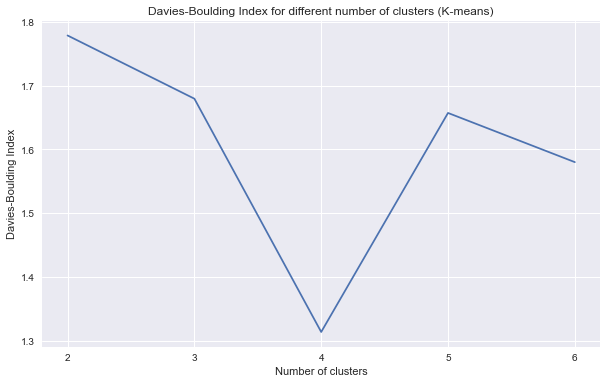

In [202]:
plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_kmeans.keys()), list(results_db_kmeans.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (K-means)')
plt.show()

### Silhouette Score

The Silhouette Coefficient tells us how well-assigned each individual point is. If S(i) is close to 0, it is right at the inflection point between two clusters. If it is closer to -1, then we would have been better off assigning it to the other cluster. If S(i) is close to 1, then the point is well-assigned and can be interpreted as belonging to an ‘appropriate’ cluster.

In [26]:
results_sil_kmeans = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    sil_score = silhouette_score(X, labels)
    results_sil_kmeans.update({i: sil_score})

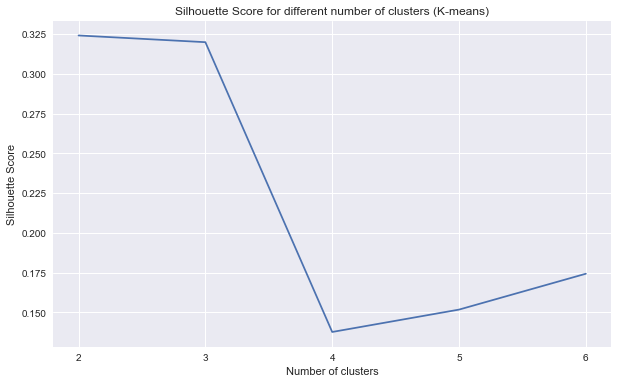

In [203]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_kmeans.keys()), list(results_sil_kmeans.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (K-means)')
plt.show()

### Calinski-Harabasz Index

Calinski-Harabasz Index is also known as the Variance Ratio Criterion.
The score is defined as the ratio between the within-cluster dispersion and the between-cluster dispersion.
The higher the Index, the better the performance.

Higher value of CH index means the clusters are dense and well separated, although there is no “acceptable” cut-off value. We need to choose that solution which gives a peak or at least an abrupt elbow on the line plot of CH indices. On the other hand, if the line is smooth (horizontal or ascending or descending) then there is no such reason to prefer one solution over others.

In [25]:
results_ch_kmeans = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X)
    
    ch_score = calinski_harabasz_score(X, labels)
    results_ch_kmeans.update({i: ch_score})

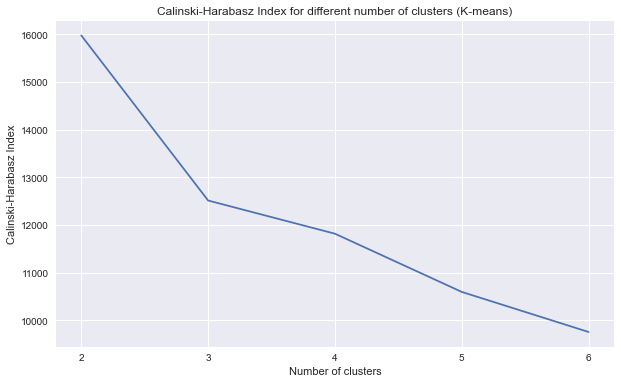

In [204]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_kmeans.keys()), list(results_ch_kmeans.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (K-means)')
plt.show()

# Hierarchical clustering

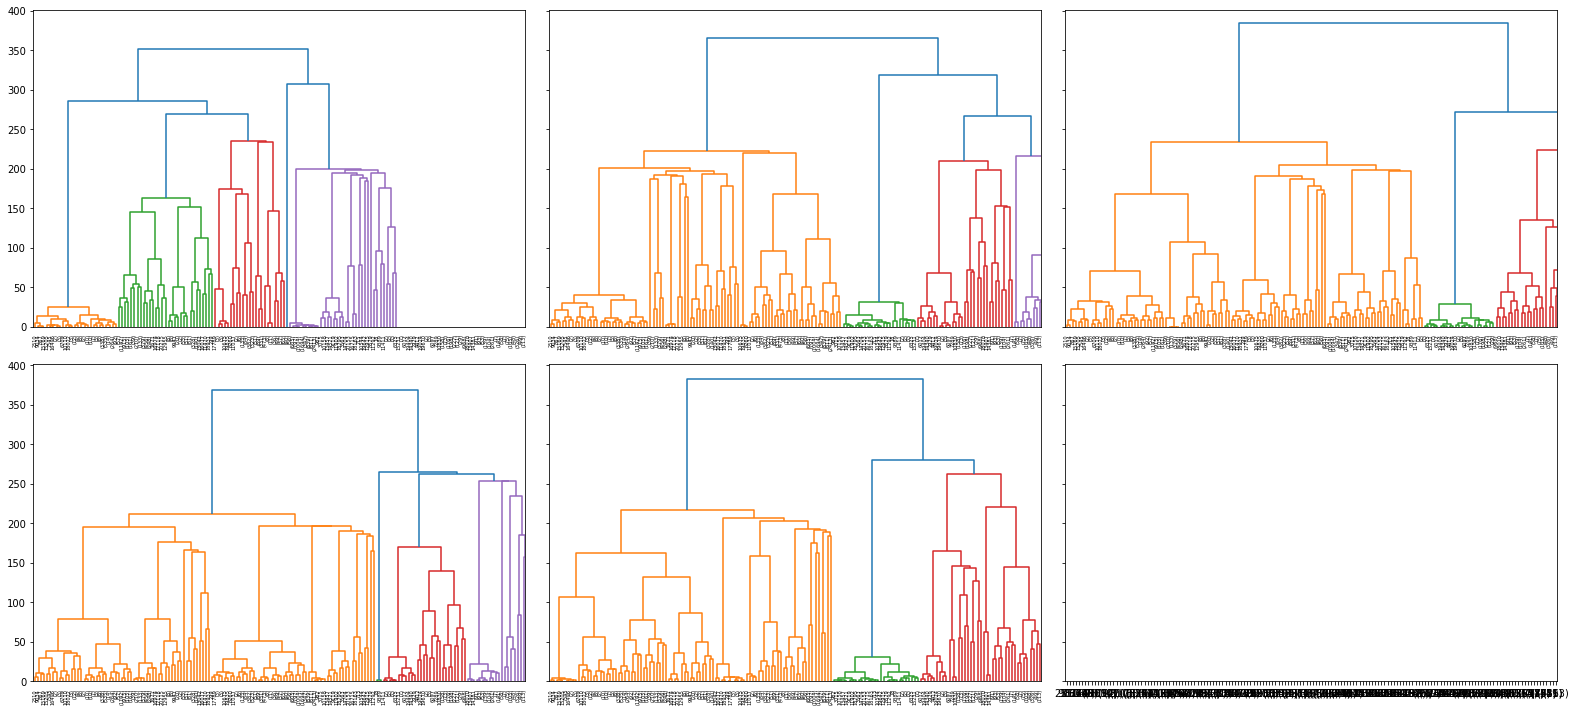

In [146]:
import scipy.cluster.hierarchy as shc

shuffled = np.copy(X)
np.random.shuffle(shuffled)
splits = np.split(shuffled, 5) # split data, as it is too big

fig, ax = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True, figsize=(22, 10))

all_links = []
for i, s in enumerate(splits):
    links = shc.linkage(s, method='ward')
    all_links.append(links)
    if i < 3:
        dend = shc.dendrogram(links, truncate_mode='level', p=7, ax=ax[0][i])
    else:
        dend = shc.dendrogram(links, truncate_mode='level', p=7, ax=ax[1][i-3])
plt.tight_layout()
plt.show()

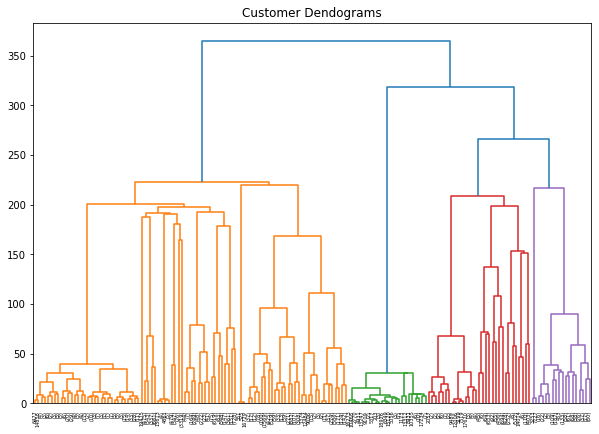

In [147]:
# show any particular graph in more detail
plot_num = 1

plt.figure(figsize=(10, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(all_links[plot_num], truncate_mode='level', p=7)

From the graphs we can conclude that the optimal number of clusters is between 4 and 6

In [175]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import NearestCentroid

K = 5
hierarchy = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = 'ward')
splits_hierarchy = []
for split in splits:
    clusters = hierarchy.fit_predict(split)
    splits_hierarchy.append((split, clusters))
splits_hierarchy[0]

# can be analysed by splits

# sorta hierarchical
# uses partial hierarcy -> assigns rest of the data to existing clusters 

base_hierarchy = 0
clf = NearestCentroid()
clf.fit(splits_hierarchy[base_hierarchy][0], splits_hierarchy[base_hierarchy][1])
clusters_5 = clf.predict(X)

In [176]:
K = 4
hierarchy = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = 'ward')
splits_hierarchy = []
for split in splits:
    clusters = hierarchy.fit_predict(split)
    splits_hierarchy.append((split, clusters))
splits_hierarchy[0]

base_hierarchy = 0
clf = NearestCentroid()
clf.fit(splits_hierarchy[base_hierarchy][0], splits_hierarchy[base_hierarchy][1])
clusters_4 = clf.predict(X)

In [177]:
K = 6
hierarchy = AgglomerativeClustering(n_clusters = K, affinity = 'euclidean', linkage = 'ward')
splits_hierarchy = []
for split in splits:
    clusters = hierarchy.fit_predict(split)
    splits_hierarchy.append((split, clusters))
splits_hierarchy[0]

base_hierarchy = 0
clf = NearestCentroid()
clf.fit(splits_hierarchy[base_hierarchy][0], splits_hierarchy[base_hierarchy][1])
clusters_6 = clf.predict(X)

In [183]:
silhouette_score_c_4 = silhouette_score(X, clusters_4)
davies_bouldin_score_c_4 = davies_bouldin_score(X, clusters_4)
calinski_harabasz_score_c_4 = calinski_harabasz_score(X, clusters_4)

print(f'Silhouette Score(n=4): {silhouette_score_c_4}')
print(f'Davies-Boulding Index (n=4): {davies_bouldin_score_c_4}')
print(f'Calinski-Harabasz Index (n=4): {calinski_harabasz_score_c_4}')

silhouette_score_c_5 = silhouette_score(X, clusters_5)
davies_bouldin_score_c_5 = davies_bouldin_score(X, clusters_5)
calinski_harabasz_score_c_5 = calinski_harabasz_score(X, clusters_5)

print(f'Silhouette Score(n=5): {silhouette_score_c_5}')
print(f'Davies-Boulding Index (n=5): {davies_bouldin_score_c_5}')
print(f'Calinski-Harabasz Index (n=5): {calinski_harabasz_score_c_5}')

silhouette_score_c_6 = silhouette_score(X, clusters_6)
davies_bouldin_score_c_6 = davies_bouldin_score(X, clusters_6)
calinski_harabasz_score_c_6 = calinski_harabasz_score(X, clusters_6)

print(f'Silhouette Score(n=6): {silhouette_score_c_6}')
print(f'Davies-Boulding Index (n=6): {davies_bouldin_score_c_6}')
print(f'Calinski-Harabasz Index (n=6): {calinski_harabasz_score_c_6}')

Silhouette Score(n=4): 0.24510319160023136
Davies-Boulding Index (n=4): 1.1660877308306414
Calinski-Harabasz Index (n=4): 8832.658128118814
Silhouette Score(n=5): 0.2359283154914985
Davies-Boulding Index (n=5): 1.2085875642541906
Calinski-Harabasz Index (n=5): 9140.381557171988
Silhouette Score(n=6): 0.16207892363447063
Davies-Boulding Index (n=6): 1.265109457990629
Calinski-Harabasz Index (n=6): 8888.118081093648


In [65]:
silhouette_score_c_4 = 0.24510319160023136
davies_bouldin_score_c_4 = 1.1660877308306414
calinski_harabasz_score_c_4 = 8832.658128118814

silhouette_score_c_5 = 0.2359283154914985
davies_bouldin_score_c_5 = 1.2085875642541906
calinski_harabasz_score_c_5 = 9140.381557171988

silhouette_score_c_6 = 0.16207892363447063
davies_bouldin_score_c_6 = 1.265109457990629
calinski_harabasz_score_c_6 = 8888.118081093648

In [66]:
results_sil_hc = {4: silhouette_score_c_4,
                  5: silhouette_score_c_5,
                  6: silhouette_score_c_6}

results_db_hc =  {4: davies_bouldin_score_c_4,
                  5: davies_bouldin_score_c_5,
                  6: davies_bouldin_score_c_6}

results_ch_hc =  {4: calinski_harabasz_score_c_4,
                  5: calinski_harabasz_score_c_5,
                  6: calinski_harabasz_score_c_6}

### Silhouette Score

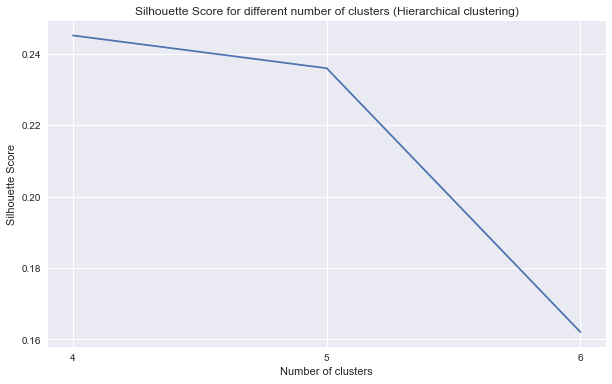

In [67]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_hc.keys()), list(results_sil_hc.values()), label = 'Silhouette Score')

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (Hierarchical clustering)')
plt.show()

### Davies-Boulding Index

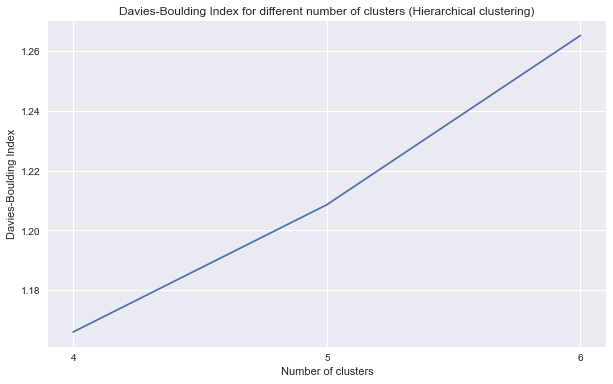

In [68]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_hc.keys()), list(results_db_hc.values()))

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (Hierarchical clustering)')
plt.show()

### Calinski-Harabasz Index

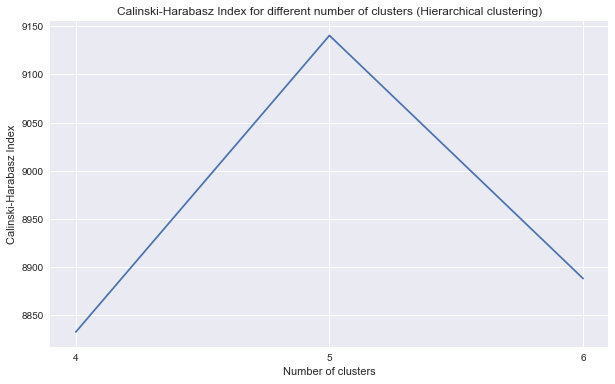

In [69]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_hc.keys()), list(results_ch_hc.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (Hierarchical clustering)')
plt.show()

# Self-Organizing Maps

In [27]:
!pip install sklearn_som

You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.8/bin/python3.8 -m pip install --upgrade pip' command.


In [86]:
from sklearn_som.som import SOM

# m * n = number of clusters you expect to have 
som = SOM(m = 1, n = 5, dim = X.shape[1], random_state = 96)
som.fit(X)
clusters = som.predict(X)
clusters

array([3, 1, 0, ..., 4, 4, 2])

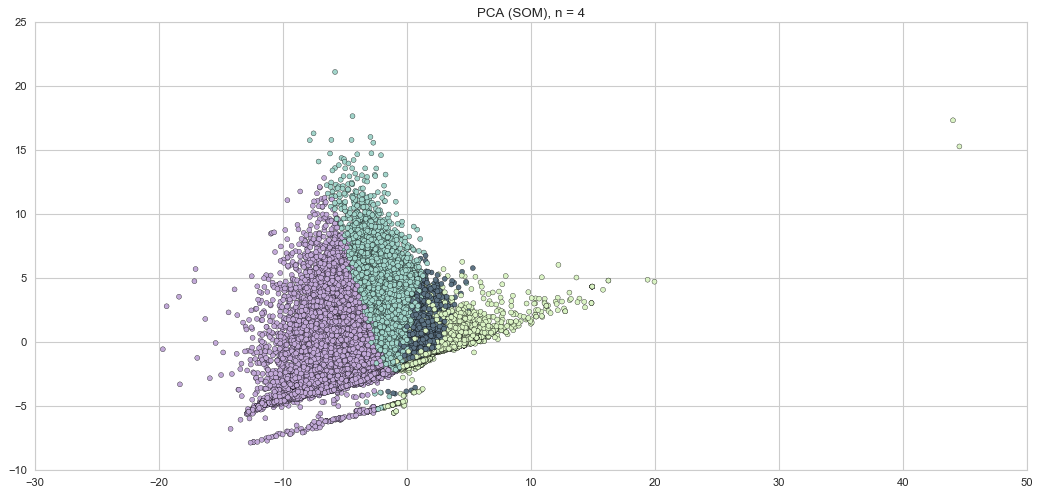

In [85]:
plt.style.use('seaborn-whitegrid')
colors = np.sqrt(np.random.randint(0, 255, size = (len(set(clusters)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(clusters))))

plt.figure(figsize = (16, 7)); plt.title('PCA (SOM), n = 4')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c = c_arr);

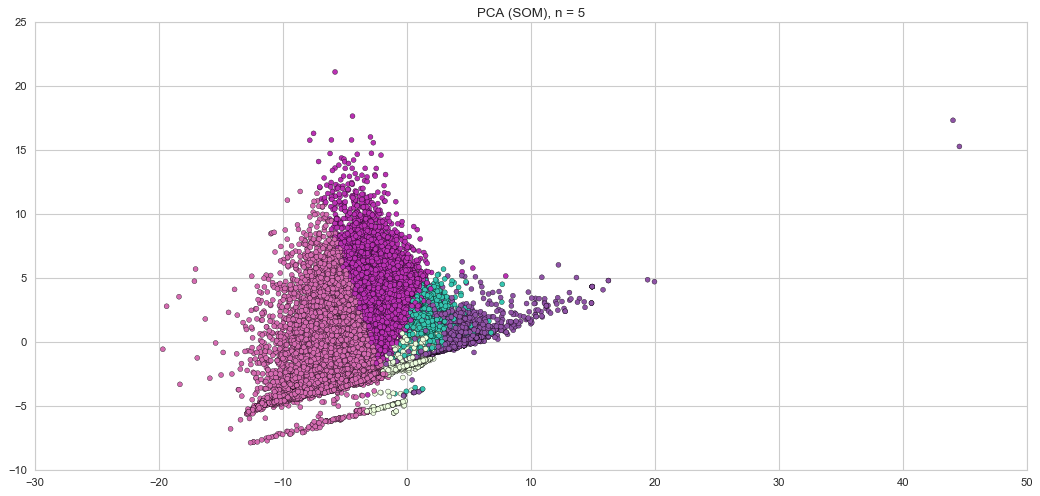

In [140]:
colors = np.sqrt(np.random.randint(0,255, size = (len(set(clusters)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(clusters))))

plt.figure(figsize = (16, 7)); plt.title('PCA (SOM), n = 5')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c = c_arr);

### Silhouette Score

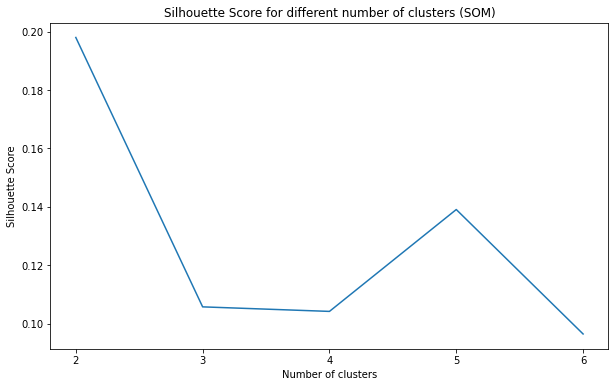

In [170]:
results_sil_som = {}
for i in range(2, 7):
    
    som = SOM(m = 1, n = i, dim = X.shape[1], random_state = 96)
    labels = som.fit_predict(X)
    
    sil_score = silhouette_score(X, labels)
    results_sil_som.update({i: sil_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_som.keys()), list(results_sil_som.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (SOM)')
plt.show()

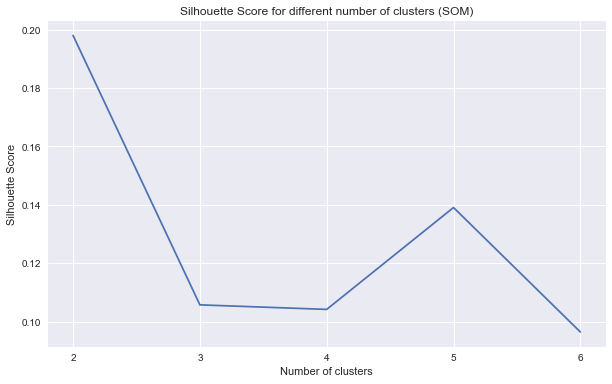

In [209]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_som.keys()), list(results_sil_som.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (SOM)')
plt.show()

### Davies-Boulding Index

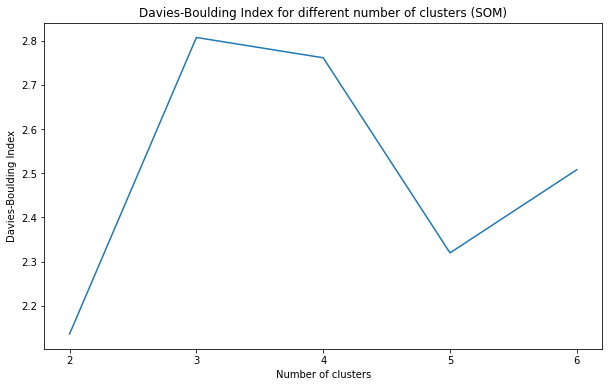

In [168]:
results_db_som = {}
for i in range(2, 7):
    
    som = SOM(m = 1, n = i, dim = X.shape[1], random_state = 96)
    labels = som.fit_predict(X)
    
    db_index = davies_bouldin_score(X, labels)
    results_db_som.update({i: db_index})

plt.figure(figsize=(10, 6))

plt.plot(list(results_db_som.keys()), list(results_db_som.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (SOM)')
plt.show()

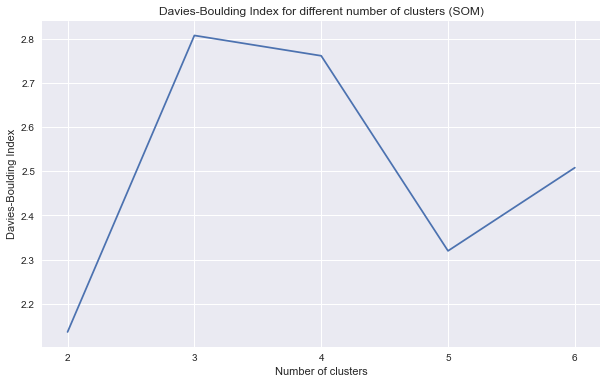

In [211]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_som.keys()), list(results_db_som.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (SOM)')
plt.show()

### Calinski-Harabasz Index

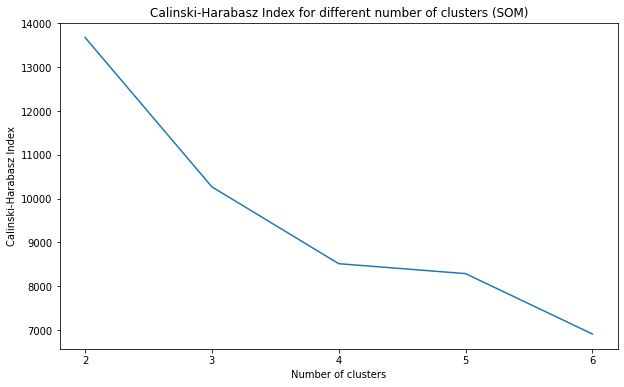

In [169]:
results_ch_som = {}
for i in range(2, 7):
    
    som = SOM(m = 1, n = i, dim = X.shape[1], random_state = 96)
    labels = som.fit_predict(X)
    
    ch_score = calinski_harabasz_score(X, labels)
    results_ch_som.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_som.keys()), list(results_ch_som.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (SOM)')
plt.show()

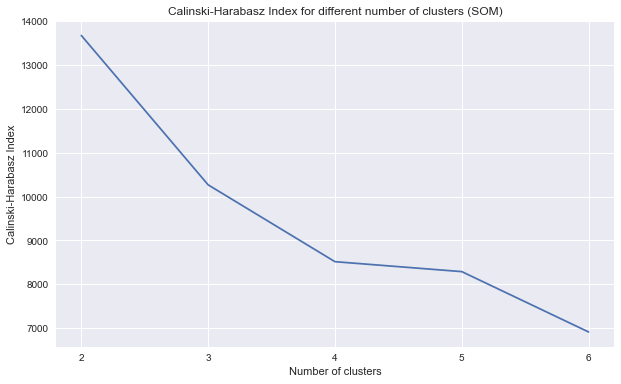

In [212]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_som.keys()), list(results_ch_som.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (SOM)')
plt.show()

# Expectation-Maximization Algorithm

In [20]:
from sklearn.mixture import GaussianMixture
from sklearn import metrics

sil_scores = []
for k in range(4, 7):
    tmp_scores = []
    for i in range(3): # EM algorithm can generate diffrent results depending on the starting point, so run 3 times to estimate score
        gm = GaussianMixture(n_components=k)
        labels = gm.fit_predict(X)
        score = metrics.silhouette_score(X, labels, metric='euclidean')
        tmp_scores.append(score)
    sil_scores.append(np.mean(tmp_scores))
print(sil_scores)

[0.09984244087790084, 0.08106275951902647, 0.060598820315219605]


In [ ]:
# Highest sil score indicates the best choice for number of components (i.e. number of clusters)
gm = GaussianMixture(n_components=5)
labels = gm.fit_predict(X)

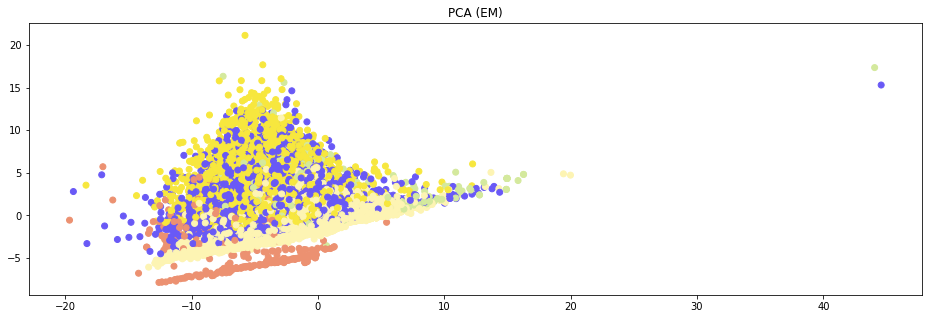

In [52]:
colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 5')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

In [ ]:
colors = np.sqrt(np.random.randint(0,255, size=(len(set(labels)), 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(labels))))

plt.figure(figsize=(16,5)); plt.title('PCA (EM), n = 4')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

### Silhouette Score

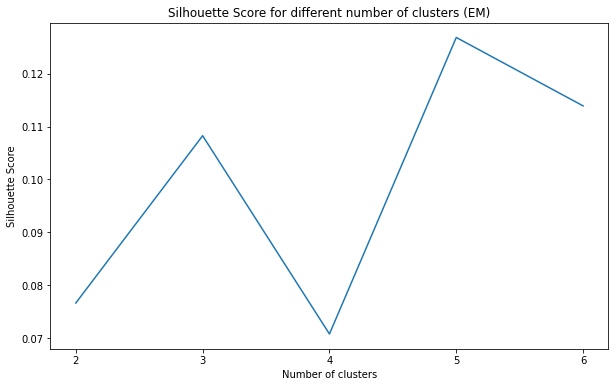

In [190]:
results_sil_em = {}
for i in range(2, 7):
    
    gm = GaussianMixture(n_components = k)
    labels = gm.fit_predict(X)
    
    sil_score = silhouette_score(X, labels)
    results_sil_em.update({i: sil_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_em.keys()), list(results_sil_em.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (EM)')
plt.show()

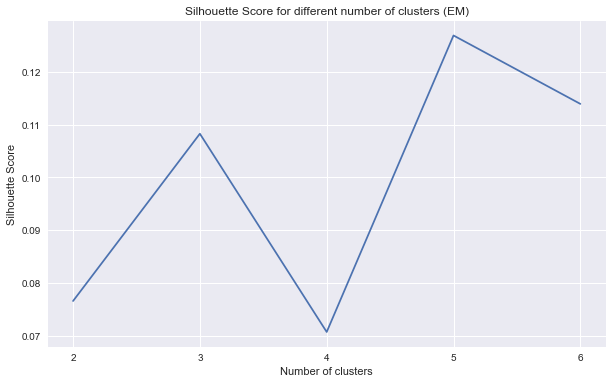

In [213]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_em.keys()), list(results_sil_em.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (EM)')
plt.show()

### Davies-Boulding Index

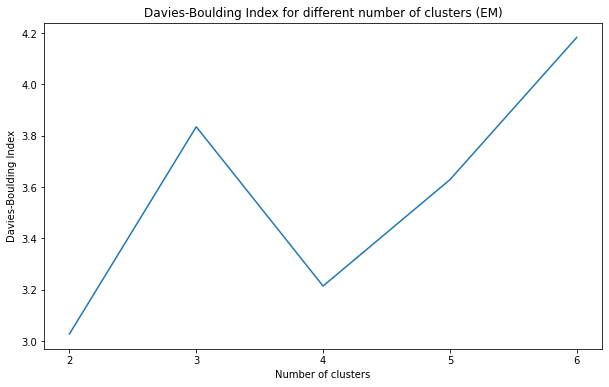

In [189]:
results_db_em = {}
for i in range(2, 7):
    
    gm = GaussianMixture(n_components = k)
    labels = gm.fit_predict(X)
    
    db_index = davies_bouldin_score(X, labels)
    results_db_em.update({i: db_index})

plt.figure(figsize=(10, 6))

plt.plot(list(results_db_em.keys()), list(results_db_em.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (EM)')
plt.show()

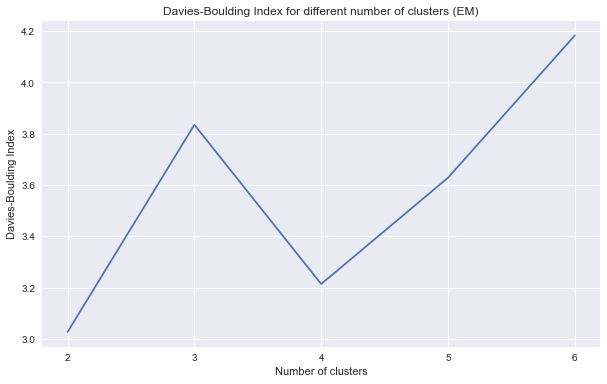

In [214]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_em.keys()), list(results_db_em.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (EM)')
plt.show()

### Calinski-Harabasz Index

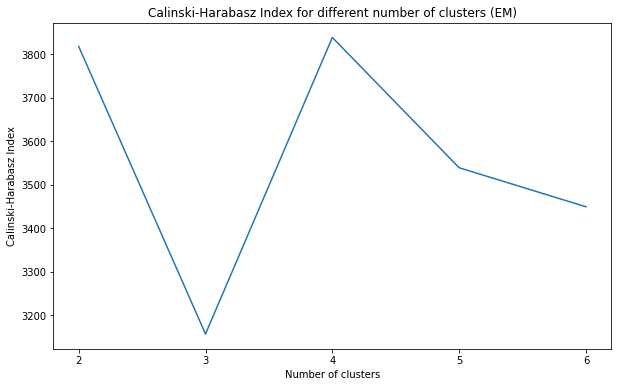

In [187]:
results_ch_em = {}
for i in range(2, 7):
    
    gm = GaussianMixture(n_components = k)
    labels = gm.fit_predict(X)
    
    ch_score = calinski_harabasz_score(X, labels)
    results_ch_em.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (EM)')
plt.show()

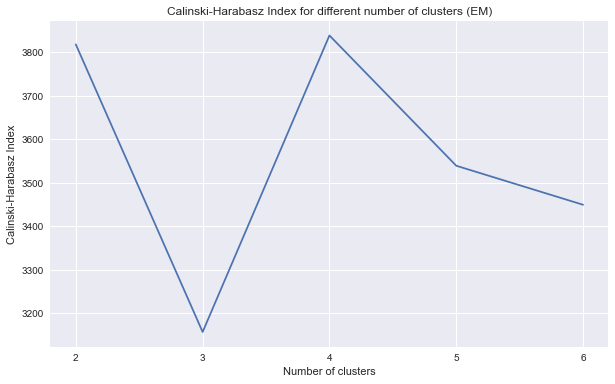

In [215]:
plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_em.keys()), list(results_ch_em.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (EM)')
plt.show()

In [236]:
all_sil_arr = [[4, 0, results_sil_hc[4], results_sil_som[4], results_sil_em[4]],
            [5, 0, results_sil_hc[5], results_sil_som[5], results_sil_em[5]],
            [6, 0, results_sil_hc[6], results_sil_som[6], results_sil_em[6]]]

all_sil_metrics = pd.DataFrame(all_sil_arr,
                  columns = ['Cluster', 'K-means', 'Hierarchical clustering', 'Self-Organizing Maps',
                           'Expectation-Maximization Algorithm'],
                  index = [4, 5, 6])

In [241]:
all_sil_arr = [[4, 'K-means', 0],
               [5, 'K-means', 0],
               [6, 'K-means', 0],
               [4, 'Hierarchical clustering', results_sil_hc[4]],
               [5, 'Hierarchical clustering', results_sil_hc[5]],
               [6, 'Hierarchical clustering', results_sil_hc[6]],
               [4, 'Self-Organizing Maps', results_sil_som[4]],
               [5, 'Self-Organizing Maps', results_sil_som[5]], 
               [6, 'Self-Organizing Maps', results_sil_som[6]],
               [4, 'Expectation-Maximization Algorithm', results_sil_em[4]],
               [5, 'Expectation-Maximization Algorithm', results_sil_em[5]],
               [6, 'Expectation-Maximization Algorithm', results_sil_em[6]]]
               
all_sil_metrics = pd.DataFrame(all_sil_arr,
                  columns = ['Cluster', 'Method', 'Value'])
                  #index = [4, 5, 6])

In [242]:
all_sil_metrics

,Cluster,Method,Value
0,4,K-means,0.000000
1,5,K-means,0.000000
2,6,K-means,0.000000
3,4,Hierarchical clustering,0.245103
4,5,Hierarchical clustering,0.235928
5,6,Hierarchical clustering,0.162079
6,4,Self-Organizing Maps,0.104167
7,5,Self-Organizing Maps,0.139063
8,6,Self-Organizing Maps,0.096435
9,4,Expectation-Maximization Algorithm,0.070803


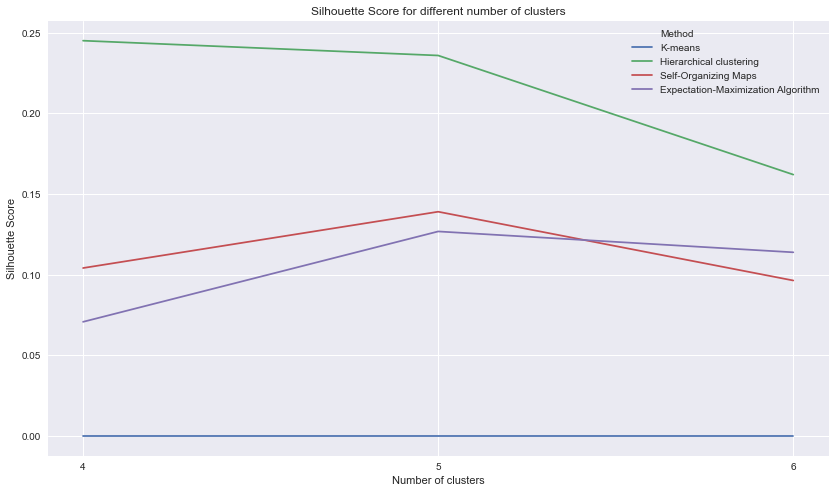

In [248]:
plt.figure(figsize=(14, 8))
sns.lineplot(data = all_sil_metrics, x = 'Cluster', y = 'Value', hue = 'Method');

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters')
plt.show()

In [225]:
#print(results_sil_kmean)
#print(results_db_kmean)
#print(results_ch_kmean)

print(results_sil_hc)
print(results_db_hc)
print(results_ch_hc, '\n')

print(results_sil_som)
print(results_db_som)
print(results_ch_som, '\n')

print(results_sil_em)
print(results_db_em)
print(results_ch_em)

{4: 0.24510319160023136, 5: 0.2359283154914985, 6: 0.16207892363447063}
{4: 1.1660877308306414, 5: 1.2085875642541906, 6: 1.265109457990629}
{4: 8832.658128118814, 5: 9140.381557171988, 6: 8888.118081093648} 

{2: 0.1980039691011599, 3: 0.10572190594041592, 4: 0.1041671038654041, 5: 0.13906348285537384, 6: 0.09643463980913455}
{2: 2.136408771637795, 3: 2.806943840812887, 4: 2.7610000529942913, 5: 2.3198074610102646, 6: 2.5079113050617567}
{2: 13677.620420387746, 3: 10269.528222062387, 4: 8516.164232548015, 5: 8289.5284958362, 6: 6912.385391118864} 

{2: 0.07665755197305783, 3: 0.10826747329365503, 4: 0.07080321031914628, 5: 0.12683488840288956, 6: 0.11390447550750622}
{2: 3.027425153151228, 3: 3.834952761213184, 4: 3.214323969672477, 5: 3.6285811540843556, 6: 4.182988735085289}
{2: 3818.2659028287676, 3: 3156.319023994064, 4: 3838.8431557554645, 5: 3538.948860100953, 6: 3449.1418901952925}


In [144]:
# Kmeans
results_sil_kmean = {2: 0.32486442607513955, 3: 0.3211563611694346, 4: 0.292215885055288, 5: 0.1562934289688432, 6: 0.17426590989149876}
results_db_kmean = {2: 1.778838218281067, 3: 1.6803273884949868, 4: 1.3137080714802494, 5: 1.6571317545159527, 6: 1.7399194968504137}
results_ch_kmean = {2: 15978.971299854242, 3: 12508.713389131019, 4: 11819.29791846296, 5: 10647.800668869555, 6: 9786.965876715716}

# HC
results_sil_hc = {4: 0.24510319160023136, 5: 0.2359283154914985, 6: 0.16207892363447063}
results_db_hc = {4: 1.1660877308306414, 5: 1.2085875642541906, 6: 1.265109457990629}
results_ch_hc = {4: 8832.658128118814, 5: 9140.381557171988, 6: 8888.118081093648}

# SOM
results_sil_som = {2: 0.1980039691011599, 3: 0.10572190594041592, 4: 0.1041671038654041, 5: 0.13906348285537384, 6: 0.09643463980913455}
results_db_som = {2: 2.136408771637795, 3: 2.806943840812887, 4: 2.7610000529942913, 5: 2.3198074610102646, 6: 2.5079113050617567}
results_ch_som = {2: 13677.620420387746, 3: 10269.528222062387, 4: 8516.164232548015, 5: 8289.5284958362, 6: 6912.385391118864}

# EM
results_sil_em = {2: 0.07665755197305783, 3: 0.10826747329365503, 4: 0.07080321031914628, 5: 0.12683488840288956, 6: 0.11390447550750622}
results_db_em = {2: 3.027425153151228, 3: 3.834952761213184, 4: 3.214323969672477, 5: 3.6285811540843556, 6: 4.182988735085289}
results_ch_em = {2: 3818.2659028287676, 3: 3156.319023994064, 4: 3838.8431557554645, 5: 3538.948860100953, 6: 3449.1418901952925}

# Encoder + kmeans
results_sil_kmeans_enc = {2: 0.3556765161804125, 3: 0.3192944994714796, 4: 0.2272479613887269, 5: 0.19947129679121733, 6: 0.19031189118576233}
results_db_kmeans_enc = {2: 1.6037585358718083, 3: 1.8138472527827407, 4: 1.5000920892642415, 5: 1.9658720932575036, 6: 1.7556864240211878}
results_ch_kmeans_enc = {2: 2934.8548126067017, 3: 5096.247528779892, 4: 4366.449898445508, 5: 5437.122797505461, 6: 6140.148664081472}

# Encoder + kmeans

In [21]:
pip install torch

     |████████████████████████████████| 129.9 MB 542 kB/s eta 0:00:013  |                                | 184 kB 1.0 MB/s eta 0:02:07     |█▍                              | 5.8 MB 2.6 MB/s eta 0:00:48     |██                              | 8.4 MB 1.4 MB/s eta 0:01:27     |██▊                             | 11.1 MB 1.4 MB/s eta 0:01:26     |███▉                            | 15.3 MB 4.0 MB/s eta 0:00:29     |████▉                           | 19.7 MB 2.1 MB/s eta 0:00:53     |██████▍                         | 26.1 MB 1.6 MB/s eta 0:01:05     |████████████▎                   | 49.6 MB 826 kB/s eta 0:01:38     |██████████████▏                 | 57.5 MB 2.3 MB/s eta 0:00:32     |███████████████                 | 60.6 MB 2.3 MB/s eta 0:00:31     |███████████████                 | 61.0 MB 2.3 MB/s eta 0:00:30     |█████████████████               | 68.7 MB 1.3 MB/s eta 0:00:46     |██████████████████▏             | 73.6 MB 5.9 MB/s eta 0:00:10     |███████████████████▌            | 79.3 MB 1.9 

In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torch.utils.data as data
from torch.utils.data import DataLoader

In [23]:
x_ = torch.tensor(X, dtype=torch.float32)

torch.manual_seed(96)
batch_size = 128
full_dataset = data.TensorDataset(x_, x_)

train_size = int(0.8 * len(full_dataset))
test_size = len(full_dataset) - train_size
train, test = torch.utils.data.random_split(full_dataset, [train_size, test_size])

train_loader = torch.utils.data.DataLoader(train, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=batch_size, shuffle=False)

In [24]:
class encoder_decoder(nn.Module):
    def __init__(self) -> None:
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Linear(35, 24),
            nn.BatchNorm1d(24),
            nn.LeakyReLU(),
            nn.Linear(24, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),
            nn.Linear(16, 6),
        )
        self.decoder = nn.Sequential(
            nn.Linear(6, 16),
            nn.BatchNorm1d(16),
            nn.LeakyReLU(),
            nn.Linear(16, 24),
            nn.BatchNorm1d(24),
            nn.LeakyReLU(),
            nn.Linear(24, 35),
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [25]:
model = encoder_decoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)

In [26]:
epochs = 100

for i in range(epochs+1):
    sum_loss, total = 0, 0
    for x, y in train_loader:
        model.train()
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)

        sum_loss += loss.item()*y.shape[0]
        total += y.size(0)
            
        loss.backward()
        optimizer.step()
    l = sum_loss/total
    if i % 10 == 0:
        print(f'Epoch {i}, loss {l}')
    with torch.no_grad():
        total = 0
        model.eval()
        for x, y in test_loader:
            y_pred = model(x)

            predicted = torch.round(y_pred)
            total += y.size(0)
            loss = criterion(y_pred, y)
            sum_loss += loss.item()*y.shape[0]

        l = sum_loss/total
        if i % 10 == 0:
            print(f'Epoch {i}, val loss {l}')
            print()

Epoch 0, loss 0.500303996224217
Epoch 0, val loss 2.259029324969811

Epoch 10, loss 0.19857325923870672
Epoch 10, val loss 0.922641388506951

Epoch 20, loss 0.17772366742290094
Epoch 20, val loss 0.8055648275240508

Epoch 30, loss 0.16488585713896303
Epoch 30, val loss 0.7753982225381336

Epoch 40, loss 0.1523791622909874
Epoch 40, val loss 0.6984536840504761

Epoch 50, loss 0.14444237532671172
Epoch 50, val loss 0.6654513762617711

Epoch 60, loss 0.13920138624852502
Epoch 60, val loss 0.6579073443404796

Epoch 70, loss 0.1362882658004631
Epoch 70, val loss 0.6254963040837302

Epoch 80, loss 0.13227389003055556
Epoch 80, val loss 0.6106665943994131

Epoch 90, loss 0.13126140435713493
Epoch 90, val loss 0.6278645789516009

Epoch 100, loss 0.1206483217346208
Epoch 100, val loss 0.7158168173066425



In [27]:
model = encoder_decoder()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.001)

full_loader = torch.utils.data.DataLoader(full_dataset, batch_size=batch_size, shuffle=False)
epochs = 100

for i in range(epochs+1):
    sum_loss, total = 0, 0
    for x, y in full_loader:
        model.train()
        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred, y)

        sum_loss += loss.item()*y.shape[0]
        total += y.size(0)
            
        loss.backward()
        optimizer.step()
    l = sum_loss/total
    if i % 10 == 0:
        print(f'Epoch {i}, loss {l}')

Epoch 0, loss 0.5229360127831786
Epoch 10, loss 0.24061342428894014
Epoch 20, loss 0.22060434712746474
Epoch 30, loss 0.20311942203364938
Epoch 40, loss 0.19093069754832992
Epoch 50, loss 0.18484831253775935
Epoch 60, loss 0.17373178417050095
Epoch 70, loss 0.16634758094859622
Epoch 80, loss 0.16161591988304588
Epoch 90, loss 0.15927630933907225
Epoch 100, loss 0.16075601069289536


In [28]:
with torch.no_grad():
    model.eval()
    X_new = model.encoder(x_).numpy()

In [75]:
X_new.shape

(101145, 6)

In [76]:
# k means determine k
distortions = []
K = range(2,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, max_iter=500, n_init=20, random_state=7).fit(X_new)
    distortions.append(sum(np.min(cdist(X_new, kmeanModel.cluster_centers_, 'euclidean'),
                                  axis=1)) / X_new.shape[0])

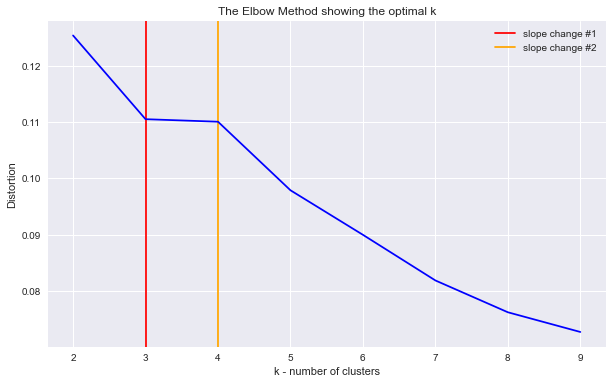

In [77]:
# Plot the elbow
plt.figure(figsize=(10, 6))
plt.axvline(3, 0, 1, label='slope change #1', color='red')
plt.axvline(4, 0, 1, label='slope change #2', color='orange')
plt.plot(K, distortions, 'bx-')
plt.xlabel('k - number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.legend(); plt.show()

In [78]:
K = 5
kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X_new)
#kmeanModel = KMeans(n_clusters=K, random_state=30).fit(X_new)

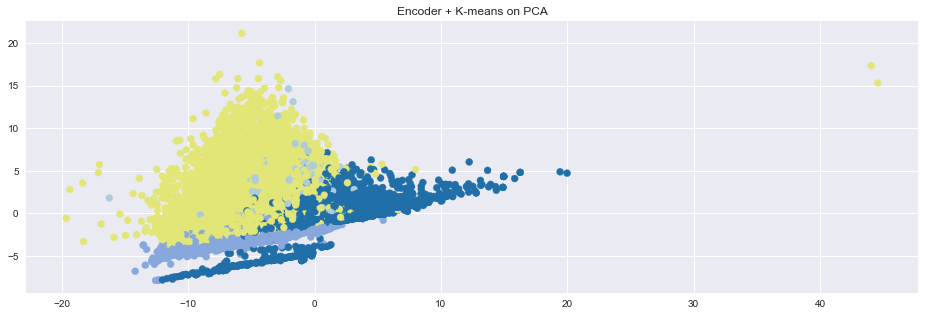

In [79]:
np.random.seed(21)
colors = np.sqrt(np.random.randint(0,255, size=(K, 3))/255)
c_arr = np.array(list(map(lambda x: colors[x], list(kmeanModel.labels_))))

# plt.figure(figsize=(16,5)); plt.title('Encoder + K-means on x_0, x_5')
# plt.scatter(X_new[:, 0], X_new[:, 1], c=c_arr);

# plt.figure(figsize=(16,5)); plt.title('Encoder + K-means on x_3, x_5')
# plt.scatter(X_new[:, 3], X_new[:, 5], c=c_arr);

Y_pca = PCA(n_components=2).fit_transform(X);
plt.figure(figsize=(16,5)); plt.title('Encoder + K-means on PCA')
plt.scatter(Y_pca[:, 0], Y_pca[:, 1], c=c_arr);

### Silhouette Score

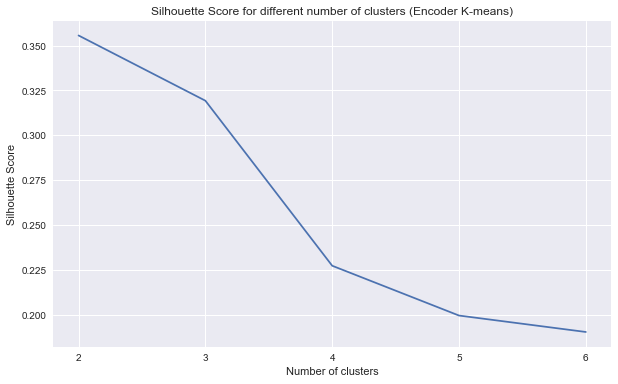

In [57]:
results_sil_kmeans_enc = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X_new)
    
    sil_score = silhouette_score(X, labels)
    results_sil_kmeans_enc.update({i: sil_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_sil_kmeans_enc.keys()), list(results_sil_kmeans_enc.values()), label = 'Silhouette Score')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for different number of clusters (Encoder K-means)')
plt.show()

### Davies-Boulding Index

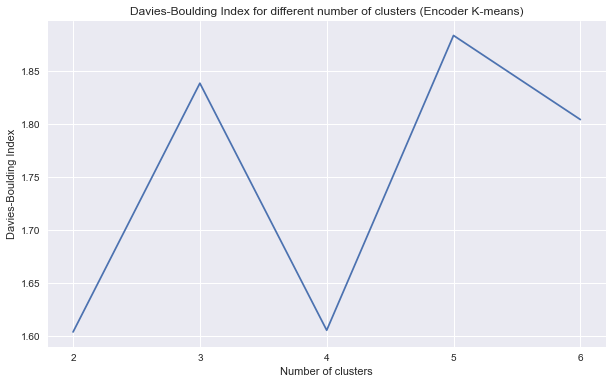

In [80]:
results_db_kmeans_enc = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X_new)
    
    db_index = davies_bouldin_score(X, labels)
    results_db_kmeans_enc.update({i: db_index})

plt.style.use('seaborn')
plt.figure(figsize=(10, 6))

plt.plot(list(results_db_kmeans_enc.keys()), list(results_db_kmeans_enc.values()))

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Davies-Boulding Index')
plt.title('Davies-Boulding Index for different number of clusters (Encoder K-means)')
plt.show()

### Calinski-Harabasz Index

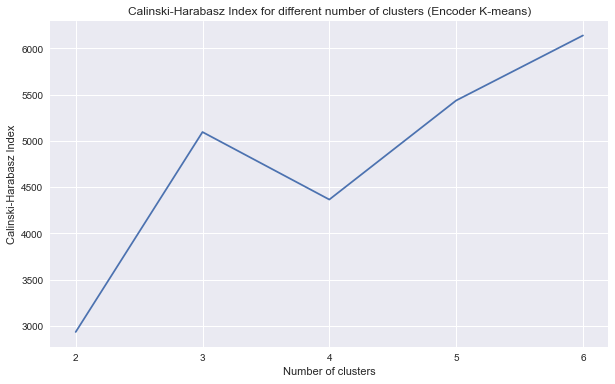

In [61]:
results_ch_kmeans_enc = {}
for i in range(2, 7):
    
    kmeans = KMeans(n_clusters = i)
    labels = kmeans.fit_predict(X_new)
    
    ch_score = calinski_harabasz_score(X, labels)
    results_ch_kmeans_enc.update({i: ch_score})

plt.figure(figsize=(10, 6))

plt.plot(list(results_ch_kmeans_enc.keys()), list(results_ch_kmeans_enc.values()), label = 'Calinski-Harabasz Index')

plt.xticks(np.arange(2, 7, step = 1))
plt.xlabel('Number of clusters')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index for different number of clusters (Encoder K-means)')
plt.show()

In [74]:
print(results_sil_kmeans_enc)
print(results_db_kmeans_enc)
print(results_ch_kmeans_enc)

{2: 0.3556765161804125, 3: 0.3192944994714796, 4: 0.2272479613887269, 5: 0.19947129679121733, 6: 0.19031189118576233}
{2: 1.6037585358718083, 3: 1.8138472527827407, 4: 1.5000920892642415, 5: 1.9658720932575036, 6: 1.7556864240211878}
{2: 2934.8548126067017, 3: 5096.247528779892, 4: 4366.449898445508, 5: 5437.122797505461, 6: 6140.148664081472}


# Total graph

In [3]:
# Kmeans
results_sil_kmeans = {2: 0.32486442607513955, 3: 0.3211563611694346, 4: 0.292215885055288, 5: 0.1562934289688432, 6: 0.17426590989149876}
results_db_kmeans = {2: 1.778838218281067, 3: 1.6803273884949868, 4: 1.3137080714802494, 5: 1.6571317545159527, 6: 1.7399194968504137}
results_ch_kmeans = {2: 15978.971299854242, 3: 12508.713389131019, 4: 11819.29791846296, 5: 10647.800668869555, 6: 9786.965876715716}

# HC
results_sil_hc = {4: 0.24510319160023136, 5: 0.2359283154914985, 6: 0.16207892363447063}
results_db_hc = {4: 1.1660877308306414, 5: 1.2085875642541906, 6: 1.265109457990629}
results_ch_hc = {4: 8832.658128118814, 5: 9140.381557171988, 6: 8888.118081093648}

# SOM
results_sil_som = {2: 0.1980039691011599, 3: 0.10572190594041592, 4: 0.1041671038654041, 5: 0.13906348285537384, 6: 0.09643463980913455}
results_db_som = {2: 2.136408771637795, 3: 2.806943840812887, 4: 2.7610000529942913, 5: 2.3198074610102646, 6: 2.5079113050617567}
results_ch_som = {2: 13677.620420387746, 3: 10269.528222062387, 4: 8516.164232548015, 5: 8289.5284958362, 6: 6912.385391118864}

# EM
results_sil_em = {2: 0.07665755197305783, 3: 0.10826747329365503, 4: 0.07080321031914628, 5: 0.12683488840288956, 6: 0.11390447550750622}
results_db_em = {2: 3.027425153151228, 3: 3.834952761213184, 4: 3.214323969672477, 5: 3.6285811540843556, 6: 4.182988735085289}
results_ch_em = {2: 3818.2659028287676, 3: 3156.319023994064, 4: 3838.8431557554645, 5: 3538.948860100953, 6: 3449.1418901952925}

# Encoder + kmeans
results_sil_kmeans_enc = {2: 0.3556765161804125, 3: 0.3192944994714796, 4: 0.2272479613887269, 5: 0.19947129679121733, 6: 0.19031189118576233}
results_db_kmeans_enc = {2: 1.6037585358718083, 3: 1.8138472527827407, 4: 1.5000920892642415, 5: 1.9658720932575036, 6: 1.7556864240211878}
results_ch_kmeans_enc = {2: 2934.8548126067017, 3: 5096.247528779892, 4: 4366.449898445508, 5: 5437.122797505461, 6: 6140.148664081472}

In [4]:
# Silhouette Score
all_sil_arr = [[4, 'K-means', results_sil_kmeans[4]],
               [5, 'K-means', results_sil_kmeans[5]],
               [6, 'K-means', results_sil_kmeans[6]],
               [4, 'Hierarchical clustering', results_sil_hc[4]],
               [5, 'Hierarchical clustering', results_sil_hc[5]],
               [6, 'Hierarchical clustering', results_sil_hc[6]],
               [4, 'Self-Organizing Maps', results_sil_som[4]],
               [5, 'Self-Organizing Maps', results_sil_som[5]], 
               [6, 'Self-Organizing Maps', results_sil_som[6]],
               [4, 'Expectation-Maximization Algorithm', results_sil_em[4]],
               [5, 'Expectation-Maximization Algorithm', results_sil_em[5]],
               [6, 'Expectation-Maximization Algorithm', results_sil_em[6]],
               [4, 'Encoder + K-means', results_sil_kmeans_enc[4]],
               [5, 'Encoder + K-means', results_sil_kmeans_enc[5]],
               [6, 'Encoder + K-means', results_sil_kmeans_enc[6]]]
               
all_sil_metrics = pd.DataFrame(all_sil_arr,
                  columns = ['Cluster', 'Method', 'Value'])

In [5]:
# Davies-Boulding Index
all_db_arr = [[4, 'K-means', results_db_kmeans[4]],
               [5, 'K-means', results_db_kmeans[5]],
               [6, 'K-means', results_db_kmeans[6]],
               [4, 'Hierarchical clustering', results_db_hc[4]],
               [5, 'Hierarchical clustering', results_db_hc[5]],
               [6, 'Hierarchical clustering', results_db_hc[6]],
               [4, 'Self-Organizing Maps', results_db_som[4]],
               [5, 'Self-Organizing Maps', results_db_som[5]], 
               [6, 'Self-Organizing Maps', results_db_som[6]],
               [4, 'Expectation-Maximization Algorithm', results_db_em[4]],
               [5, 'Expectation-Maximization Algorithm', results_db_em[5]],
               [6, 'Expectation-Maximization Algorithm', results_db_em[6]],
               [4, 'Encoder + K-means', results_db_kmeans_enc[4]],
               [5, 'Encoder + K-means', results_db_kmeans_enc[5]],
               [6, 'Encoder + K-means', results_db_kmeans_enc[6]]]
               
all_db_metrics = pd.DataFrame(all_db_arr,
                  columns = ['Cluster', 'Method', 'Value'])

In [6]:
# Calinski-Harabasz Index
all_ch_arr = [[4, 'K-means', results_ch_kmeans[4]],
               [5, 'K-means', results_ch_kmeans[5]],
               [6, 'K-means', results_ch_kmeans[6]],
               [4, 'Hierarchical clustering', results_ch_hc[4]],
               [5, 'Hierarchical clustering', results_ch_hc[5]],
               [6, 'Hierarchical clustering', results_ch_hc[6]],
               [4, 'Self-Organizing Maps', results_ch_som[4]],
               [5, 'Self-Organizing Maps', results_ch_som[5]], 
               [6, 'Self-Organizing Maps', results_ch_som[6]],
               [4, 'Expectation-Maximization Algorithm', results_ch_em[4]],
               [5, 'Expectation-Maximization Algorithm', results_ch_em[5]],
               [6, 'Expectation-Maximization Algorithm', results_ch_em[6]],
               [4, 'Encoder + K-means', results_ch_kmeans_enc[4]],
               [5, 'Encoder + K-means', results_ch_kmeans_enc[5]],
               [6, 'Encoder + K-means', results_ch_kmeans_enc[6]]]
               
all_ch_metrics = pd.DataFrame(all_ch_arr,
                  columns = ['Cluster', 'Method', 'Value'])

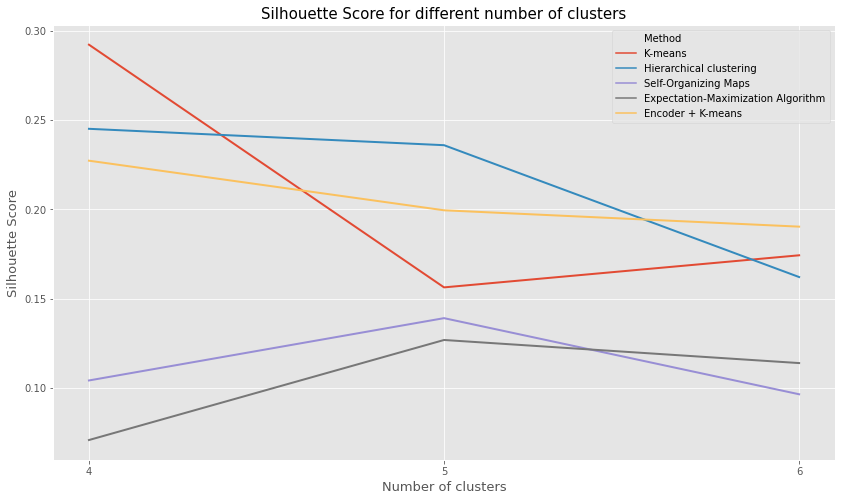

In [7]:
plt.style.use('ggplot')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_sil_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Silhouette Score', fontsize = 13)
plt.title('Silhouette Score for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

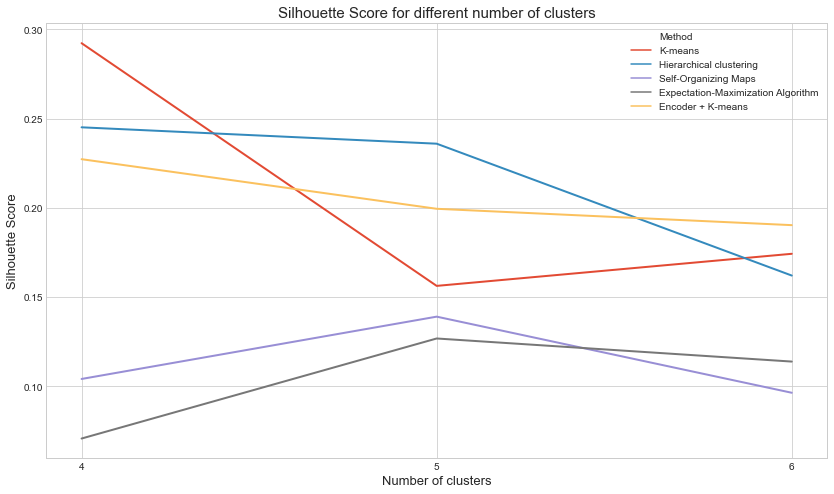

In [8]:
plt.style.use('seaborn-whitegrid')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_sil_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Silhouette Score', fontsize = 13)
plt.title('Silhouette Score for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

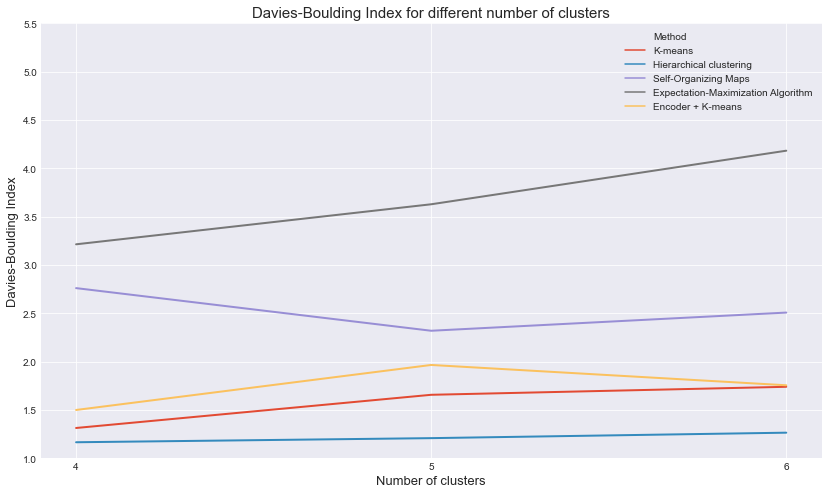

In [9]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_db_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.yticks(np.arange(1, 6, step = 0.5))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Davies-Boulding Index', fontsize = 13)
plt.title('Davies-Boulding Index for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

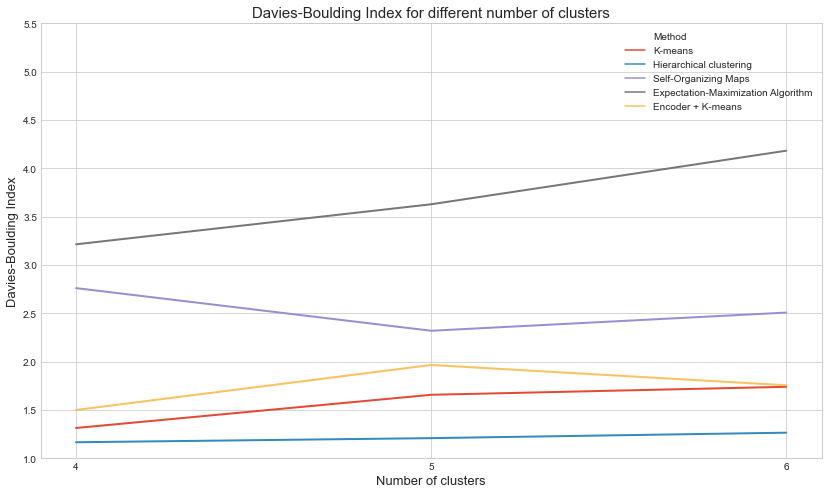

In [10]:
plt.style.use('seaborn-whitegrid')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_db_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.yticks(np.arange(1, 6, step = 0.5))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Davies-Boulding Index', fontsize = 13)
plt.title('Davies-Boulding Index for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

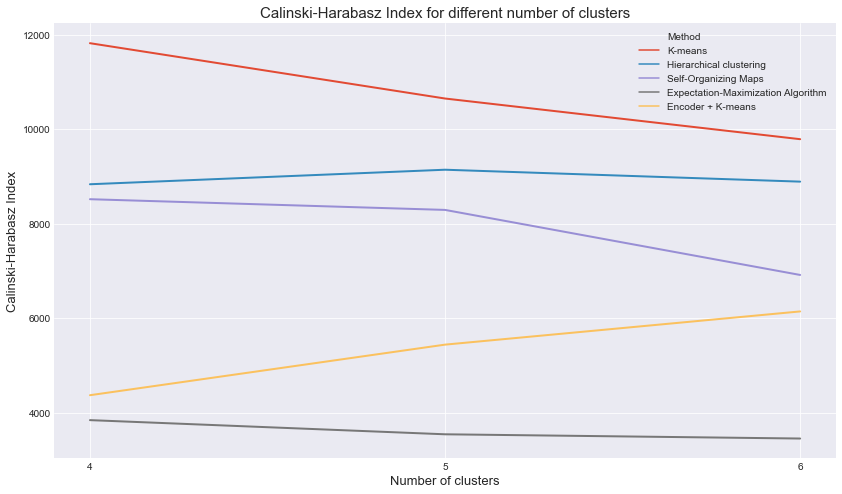

In [11]:
plt.style.use('seaborn-darkgrid')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_ch_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Calinski-Harabasz Index', fontsize = 13)
plt.title('Calinski-Harabasz Index for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

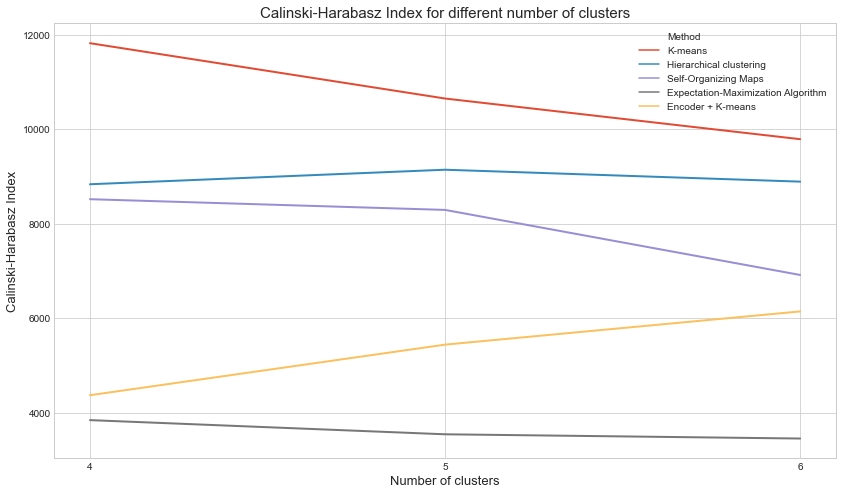

In [12]:
plt.style.use('seaborn-whitegrid')
palette = plt.get_cmap('Set1')

plt.figure(figsize=(14, 8))
sns.lineplot(data = all_ch_metrics, x = 'Cluster', y = 'Value', hue = 'Method', linewidth = 2);

plt.xticks(np.arange(4, 7, step = 1))
plt.xlabel('Number of clusters', fontsize = 13)
plt.ylabel('Calinski-Harabasz Index', fontsize = 13)
plt.title('Calinski-Harabasz Index for different number of clusters', fontsize = 15, fontweight = 0)
plt.show()

# DBSCAN

In [ ]:
import math

In [ ]:
%%time
X_sample = pd.DataFrame(X).sample(frac=0.04).values
eps, cluster_counts = [], []
for i in range(0,5):
    eps_p = 2.5 + 0.5*i
    dbscan = DBSCAN(eps=eps_p, algorithm='kd_tree', n_jobs=-1).fit(X_sample)
    n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
    eps.append(eps_p); cluster_counts.append(n_clusters_)
    print('{} / {}'.format(i+1, 5))

1 / 5
2 / 5
3 / 5
4 / 5
5 / 5
CPU times: user 14.6 s, sys: 61.6 ms, total: 14.6 s
Wall time: 4.38 s


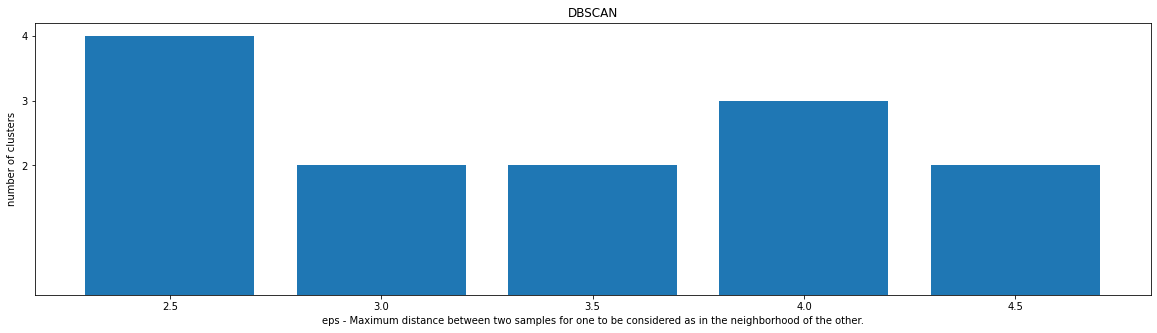

In [ ]:
#for i in range(0,5):
#    eps_p = 2.5 + 0.5*i
#    dbscan = DBSCAN(eps=eps_p, algorithm='kd_tree', n_jobs=-1).fit(X_sample)
#    n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
#    eps.append(eps_p); cluster_counts.append(n_clusters_)
#    print('{} / {}'.format(i+1, 5))

plt.figure(figsize=(20,5));
plt.yticks(range(min(cluster_counts), math.ceil(max(cluster_counts))+1));
plt.bar(np.round(np.array(eps), 2).astype(str), cluster_counts)
plt.xlabel('eps - Maximum distance between two samples for one to be considered as in the neighborhood of the other.')
plt.ylabel('number of clusters')
plt.title('DBSCAN');

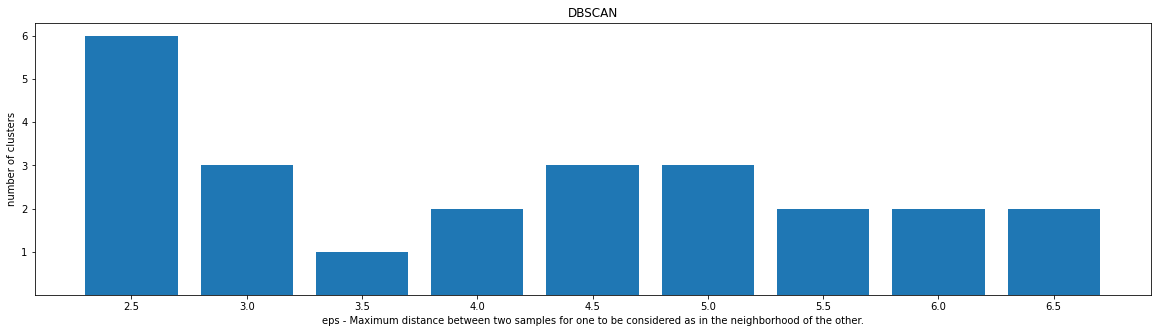

In [ ]:
#for i in range(0,9):
#    eps_p = 2.5 + 0.5*i
#    dbscan = DBSCAN(eps=eps_p, algorithm='kd_tree', n_jobs=-1).fit(X_sample)
#    n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
#    eps.append(eps_p); cluster_counts.append(n_clusters_)
#    print('{} / {}'.format(i+1, 9))

plt.figure(figsize=(20,5));
plt.yticks(range(min(cluster_counts), math.ceil(max(cluster_counts))+1));
plt.bar(np.round(np.array(eps), 2).astype(str), cluster_counts)
plt.xlabel('eps - Maximum distance between two samples for one to be considered as in the neighborhood of the other.')
plt.ylabel('number of clusters')
plt.title('DBSCAN');

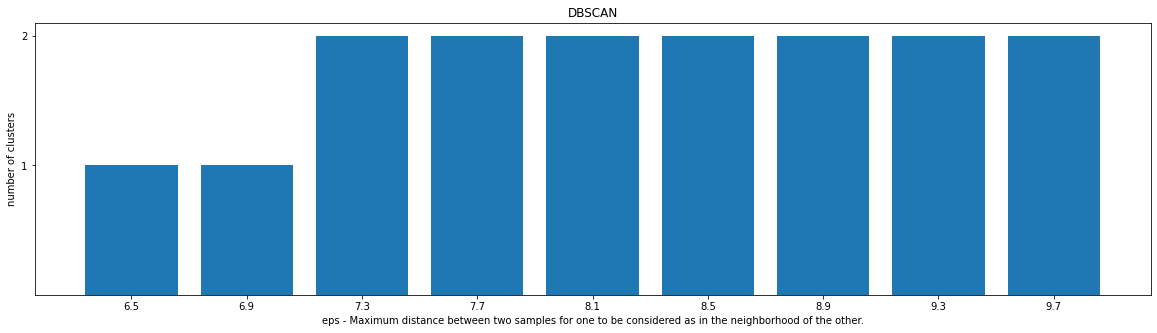

In [ ]:
#for i in range(0,9):
#    eps_p = 6.5 + 0.4*i
#    dbscan = DBSCAN(eps=eps_p, algorithm='kd_tree', n_jobs=-1).fit(X_sample)
#    n_clusters_ = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
#    eps.append(eps_p); cluster_counts.append(n_clusters_)
#    print('{} / {}'.format(i+1, 9))

plt.figure(figsize=(20,5));
plt.yticks(range(min(cluster_counts), math.ceil(max(cluster_counts))+1));
plt.bar(np.round(np.array(eps), 2).astype(str), cluster_counts)
plt.xlabel('eps - Maximum distance between two samples for one to be considered as in the neighborhood of the other.')
plt.ylabel('number of clusters')
plt.title('DBSCAN');

<h1>t-SNE</h1>

In [ ]:
from sklearn.manifold import TSNE

In [ ]:
x_sample = np.random.choice(len(X), size=10000, replace=False)

In [ ]:
%%time
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results = tsne.fit_transform(PCA(n_components=10).fit_transform(X)[x_sample])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.008s...
[t-SNE] Computed neighbors for 10000 samples in 1.017s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 0.168059
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.755264
[t-SNE] KL divergence after 300 iterations: 2.562744
CPU times: user 1min 21s, 

In [ ]:
K = 5
kmeanModel = KMeans(n_clusters=K, max_iter=500, n_init=20, random_state=7).fit(X)
sne_labels = kmeanModel.predict(X)[x_sample]

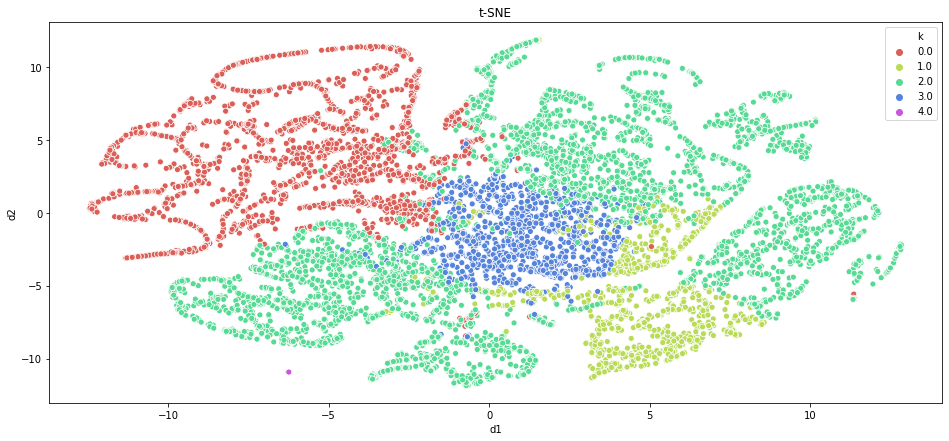

In [ ]:
tSNE = pd.DataFrame(np.vstack((tsne_results.T, sne_labels)).T, columns=['d1', 'd2', 'k'])

plt.figure(figsize=(16,7)); plt.title('t-SNE')
sns.scatterplot(x='d1', y='d2', hue='k', data=tSNE, legend='full', alpha=1.,
                palette=sns.color_palette('hls', kmeanModel.n_clusters));

<h1>RFM</h1>

In [ ]:
#Recency — number of days since the last purchase
#Frequency — number of transactions made over a given period
#Monetary — amount spent over a given period of time

In [ ]:
#ds = pd.read_csv('for_tables_filtered_data_Выкупленные.csv')
ds = pd.read_csv('for_tables_filtered_data_Выкупленные.csv', sep=';')
#ds.set_index('Телефон_new', inplace=True)

In [ ]:
ds.columns

Index(['Дата', 'ДатаДоставки', 'НомерЗаказаНаСайте', 'НовыйСтатус',
       'СуммаЗаказаНаСайте', 'СуммаДокумента', 'МетодДоставки', 'ФормаОплаты',
       'Регион', 'Группа2', 'Группа3', 'Группа4', 'Тип', 'Номенклатура',
       'ТипТовара', 'Отменено', 'ПричинаОтмены', 'Количество', 'Цена',
       'СуммаСтроки', 'ЦенаЗакупки', 'МесяцДатыЗаказа', 'ГодДатыЗаказа',
       'ПВЗ_код', 'Статус', 'Гео', 'Маржа', 'СуммаУслуг', 'СуммаДоставки',
       'НомерСтроки', 'КоличествоПроданоКлиенту', 'ДатаЗаказаНаСайте',
       'Телефон_new', 'ЭлектроннаяПочта_new', 'Клиент', 'ID_SKU',
       'ГородМагазина', 'МагазинЗаказа', 'Нов_СуммаЗаказаНаСайте',
       'Нов_СуммаСтроки', 'Нов_Маржа', 'Дата_дата', 'ДеньНеделиЦифра',
       'ДеньНедели', 'ВремяОкругл'],
      dtype='object')

In [ ]:
ds = ds.sort_values(by='Дата', ascending=False).groupby('Телефон_new').head(1)
#ds['ДатаНов'] = pd.to_datetime(ds['Дата'], format='%d.%m.%y %H:%M')
ds['ДатаНов'] = pd.to_datetime(ds['Дата_дата'], format='%Y-%m-%d')

In [ ]:
most_recent = ds['ДатаНов'].max()

In [ ]:
# Recency
ds['Recency'] = most_recent - ds['ДатаНов']

In [ ]:
Recency = ds.set_index('Телефон_new')['Recency'].dropna()
Recency = Recency[Recency.index.isin(data.index)]
Recency

Телефон_new
55575055-55484854565372    99 days
55574948-52545151514870    99 days
55574951-54555549525574    99 days
55574950-56535548515471    99 days
55574949-50525352524975    99 days
                            ...   
55574852-52525753535670   337 days
55575555-52574856514975   337 days
55575449-52575556555477   337 days
55575054-51495249505373   337 days
55575048-57525449494971   337 days
Name: Recency, Length: 105853, dtype: timedelta64[ns]

In [ ]:
data = pd.read_csv('vitrina_final.csv', sep=';')
data.set_index('Телефон_new', inplace=True)
data = data.dropna(subset = data.columns)

In [ ]:
# ??? result = pd.concat([df1, df4], axis=1, join="inner") data['Телефон_new']

In [ ]:
recency = pd.DataFrame(Recency.dt.days)
frequency = data[['Кол-во чеков_buyed']].rename(columns={'Кол-во чеков_buyed': 'Frequency'})
monetary = data[['Выручка_buyed']].rename(columns={'Выручка_buyed': 'Monetary'})

In [ ]:
assert recency.shape == frequency.shape == monetary.shape

In [ ]:
RFM = pd.merge(pd.merge(recency, frequency, on='Телефон_new'), monetary, on='Телефон_new')

In [ ]:
RFM = RFM.dropna(subset = RFM.columns)
RFM

,Recency,Frequency,Monetary,M
Телефон_new,,,,
55575055-55484854565372,99,1,12430,4
55574948-52545151514870,99,8,51576,4
55574951-54555549525574,99,2,4079,3
55574950-56535548515471,99,2,2466,3
55574949-50525352524975,99,1,219,1
...,...,...,...,...
55574852-52525753535670,337,1,2692,3
55575555-52574856514975,337,1,1197,2
55575449-52575556555477,337,1,7999,4


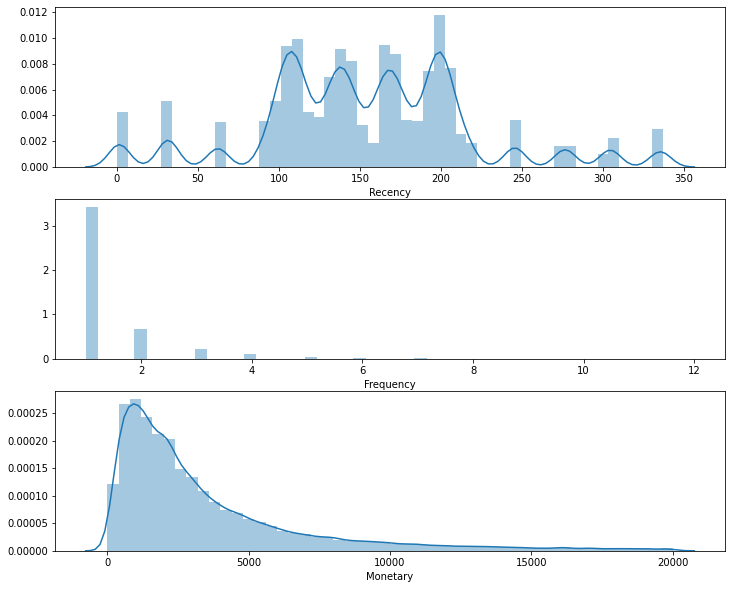

In [ ]:
# Plot RFM distributions
plt.figure(figsize=(12,10))
# Plot distribution of R
plt.subplot(3, 1, 1); sns.distplot(RFM['Recency'])
# Plot distribution of F
plt.subplot(3, 1, 2); sns.distplot(RFM['Frequency'][RFM['Frequency'] < RFM['Frequency'].quantile(0.999)])
# Plot distribution of M
plt.subplot(3, 1, 3); sns.distplot(RFM['Monetary'][RFM['Monetary'] < RFM['Monetary'].quantile(0.97)])
# Show the plot
plt.show()

In [ ]:
# --Calculate R and F groups--
# Create labels for Recency and Frequency
r_labels = range(4, 0, -1); f_labels = range(1, 4)
# Assign these labels to 4 equal percentile groups 
r_groups = pd.qcut(RFM['Recency'], q=4, labels=r_labels)
# Assign these labels to 4 equal percentile groups 
f_groups = pd.qcut(RFM['Frequency'], q=100, labels=f_labels, duplicates='drop')
# Create new columns R and F 
RFM = RFM.assign(R = r_groups.values, F = f_groups.values)
RFM.head()

In [ ]:
# Create labels for MonetaryValue
m_labels = range(1, 5)
# Assign these labels to three equal percentile groups 
m_groups = pd.qcut(RFM['Monetary'], q=4, labels=m_labels)
# Create new column M
RFM = RFM.assign(M = m_groups.values)

In [ ]:
%%time
# Concat RFM quartile values to create RFM Segments
def join_rfm(x): 
    return str(x['R']) + str(x['F']) + str(x['M'])

RFM['RFM_Segment_Concat'] = RFM.apply(join_rfm, axis=1)
rfm = RFM
rfm.head()

In [ ]:
# Count num of unique segments
rfm_count_unique = rfm.groupby('RFM_Segment_Concat')['RFM_Segment_Concat'].nunique()
print('Number of unique segmens:', rfm_count_unique.sum())

<h3>Summing the score</h3>

In [ ]:
# Calculate RFM_Score
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)
print(rfm['RFM_Score'].head())

In [ ]:
# Define rfm_level function
def rfm_level(df):
    if df['RFM_Score'] >= 9:
        return 'Can\'t Loose Them'
    elif ((df['RFM_Score'] >= 8) and (df['RFM_Score'] < 9)):
        return 'Champions'
    elif ((df['RFM_Score'] >= 7) and (df['RFM_Score'] < 8)):
        return 'Loyal'
    elif ((df['RFM_Score'] >= 6) and (df['RFM_Score'] < 7)):
        return 'Potential'
    elif ((df['RFM_Score'] >= 5) and (df['RFM_Score'] < 6)):
        return 'Sleeping' # Primising
    elif ((df['RFM_Score'] >= 4) and (df['RFM_Score'] < 5)):
        return 'Needs Attention'
    else:
        return 'Require Activation'
# Create a new variable RFM_Level
rfm['RFM_Level'] = rfm.apply(rfm_level, axis=1)
# Print the header with top 5 rows to the console
rfm.head()

,Recency,Frequency,Monetary,R,F,M,RFM_Segment_Concat,RFM_Score,RFM_Level
Phone_new,,,,,,,,,
55575057-54485151555278,0,1,2030,4,1,1,411,6.0,Potential
55574954-54524852484872,0,1,18630,4,1,4,414,9.0,Can't Loose Them
55575155-54524948515170,0,1,1059,4,1,1,411,6.0,Potential
55575655-57534851485373,0,1,5839,4,1,3,413,8.0,Champions
55574851-505154535752735,0,1,13810,4,1,4,414,9.0,Can't Loose Them


<h3>RFM results</h3>

In [ ]:
import squarify

In [ ]:
# Calculate average values for each RFM_Level, and return a size of each segment 
rfm_level_agg = rfm.groupby('RFM_Level').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': ['mean', 'count']
}).round(1)
# Print the aggregated dataset
print(rfm_level_agg)

                   Recency Frequency Monetary       
                      mean      mean     mean  count
RFM_Level                                           
Can't Loose Them       7.6       2.5  43754.7   6708
Champions             14.3       1.2  17111.3  10999
Loyal                 22.8       1.1  12858.4  16636
Needs Attention       46.2       1.0   2454.1  11246
Potential             29.7       1.1   9197.4  21610
Require Activation    54.2       1.0   1344.5   5568
Sleeping              38.4       1.0   4536.8  16117


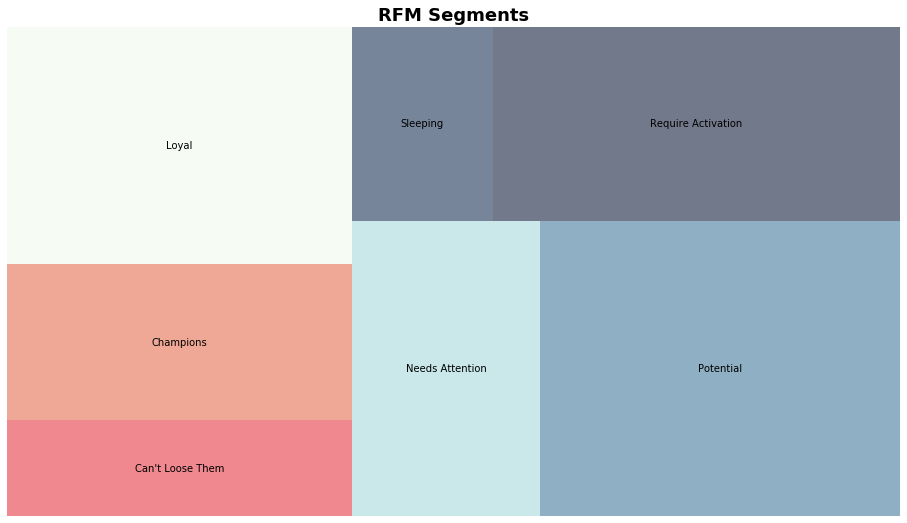

In [ ]:
rfm_level_agg.columns = rfm_level_agg.columns.droplevel()
rfm_level_agg.columns = ['RecencyMean','FrequencyMean','MonetaryMean', 'Count']
#Create our plot and resize it.
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 9)
squarify.plot(sizes=rfm_level_agg['Count'], 
              label=['Can\'t Loose Them',
                     'Champions',
                     'Loyal',
                     'Needs Attention',
                     'Potential', 
                     'Sleeping', 
                     'Require Activation'],
              color=['#e63946',
                     '#e76f51',
                     '#f1faee',
                     '#a8dadc',
                     '#457b9d',
                     '#1d3557',
                     '#14213d'],
              alpha=.6,)
plt.title("RFM Segments",fontsize=18,fontweight="bold")
plt.axis('off')
plt.show()